![Logo de l'entreprise](logo.png)



In [1]:
import pandas as pd
import ipywidgets as widgets
import math

### Importation des fichiers source

In [2]:
bilan_alimentaire = pd.read_csv('Bilans Alimentaires (2010-2020).csv', encoding='utf8')
#bilan alimentaire de volaille :Elles donneront une idée de la quantité de poulet consommée.

population_2010_2020 = pd.read_csv('Population 2010 et 2020.csv', encoding='utf8')
#Croissance de la population : Plus le taux de croissance de la population est élevé, plus la demande potentielle en poulet pourrait augmenter à l'avenir.

macro_economique_2020 = pd.read_csv('PIB.csv', encoding='utf8')
#PIB par habitant : Cela peut être un indicateur du pouvoir d'achat et donc de la capacité des personnes à se permettre d'acheter du poulet.

production_poulets_vif_2020 = pd.read_csv('Production_poulets_2020.csv', encoding='utf8')
#Commerce de poulets: Les informations sur le commerce de poulets, y compris les importations et les exportations, peuvent aider à comprendre les tendances du marché et à identifier les principaux concurrents sur le marché.


commerce_poulets_vif_2020 = pd.read_csv('import_export_poulet_vivant_2020.csv', encoding='utf8')
#Commerce de poulets: Les informations sur le commerce de poulets, y compris les importations et les exportations, peuvent aider à comprendre les tendances du marché et à identifier les principaux concurrents sur le marché.




### Découverte des données


In [3]:
bilan_alimentaire.head()


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5511,Production,2734,Viande de Volailles,2010,2010,Milliers de tonnes,855.0,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5511,Production,2734,Viande de Volailles,2011,2011,Milliers de tonnes,916.0,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5511,Production,2734,Viande de Volailles,2012,2012,Milliers de tonnes,966.0,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5511,Production,2734,Viande de Volailles,2013,2013,Milliers de tonnes,998.0,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5511,Production,2734,Viande de Volailles,2014,2014,Milliers de tonnes,1038.0,I,Valeur imputée


In [4]:
# Filtrer le DataFrame 'bilan_alimentaire' pour ne garder que les données de 2020
bilan_alimentaire = bilan_alimentaire[(bilan_alimentaire['Année'] == 2020)]

# Sélectionner les colonnes pertinentes pour l'année 2020 de 'bilan_alimentaire'
bilan_alimentaire_volaille2020 = bilan_alimentaire[['Zone', 'Élément', 'Produit', 'Année', 'Unité', 'Valeur']]

# Pivoter le DataFrame pour avoir 'Zone' comme index et ['Élément','Année'] comme nouvelles colonnes
bilan_pivot = bilan_alimentaire_volaille2020.pivot_table(index='Zone', columns=['Élément','Année'], values='Valeur', fill_value=0)



# Réinitialiser l'index de 'bilan_pivot'
bilan_pivot = bilan_pivot.reset_index()

# Renommer les colonnes pour une meilleure compréhension
bilan_pivot = bilan_pivot.rename(columns={
    'Disponibilité alimentaire (Kcal/personne/jour)': 'Dispo_Alim_kcal_pers_jour',
    'Disponibilité alimentaire en quantité (kg/personne/an)': 'Dispo_Alim_kg_pers_an',
    'Disponibilité de matière grasse en quantité (g/personne/jour)': 'Dispo_Grasse_g_pers_jour',
    'Disponibilité de protéines en quantité (g/personne/jour)': 'Dispo_Prot_g_pers_jour',
    'Disponibilité intérieure': 'Dispo_int',
    'Exportations - Quantité': 'Export_Qte',
    'Importations - Quantité': 'Import_Qte',
    'Production': 'Production'
})

# Créer un nouveau DataFrame 'bilan_alim_df' avec les colonnes nécessaires
bilan_alim_df = pd.DataFrame({
    'Zone': bilan_pivot['Zone'],
    'Dispo_intérieur en Tonne': bilan_pivot[('Dispo_int', 2020)],
    'Dispo_Alim_kcal_pers_jour_volaille': bilan_pivot[('Dispo_Alim_kcal_pers_jour', 2020)],
    'Dispo_Prot_g_pers_jour_volaille': bilan_pivot[('Dispo_Prot_g_pers_jour', 2020)],
    'Dispo_Alim_kg_pers_volaille': bilan_pivot[('Dispo_Alim_kg_pers_an', 2020)]
    
})

bilan_alim_df['Dispo_intérieur en Tonne'] = bilan_alim_df['Dispo_intérieur en Tonne'] * 1000


bilan_alim_df = bilan_alim_df.reset_index()


# Afficher le DataFrame 'bilan_alim_df'
bilan_alim_df

,index,Zone,Dispo_intérieur en Tonne,Dispo_Alim_kcal_pers_jour_volaille,Dispo_Prot_g_pers_jour_volaille,Dispo_Alim_kg_pers_volaille
0,0,Afghanistan,67000,5.98,0.61,1.71
1,1,Afrique du Sud,2067000,140.22,13.78,34.86
2,2,Albanie,40000,71.27,5.41,13.94
3,3,Algérie,280000,22.04,1.96,6.38
4,4,Allemagne,1626000,66.50,7.53,18.34
...,...,...,...,...,...,...
180,180,Émirats arabes unis,459000,104.17,10.52,31.14
181,181,Équateur,333000,81.26,6.01,18.88
182,182,États-Unis d'Amérique,19451000,231.33,20.94,58.69
183,183,Éthiopie,68000,1.99,0.20,0.59


In [5]:
population_2010_2020.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2010,2010,1000 personnes,28189.672,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,512,Hommes,3010,Population-Estimations,2010,2010,1000 personnes,14240.377,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,513,Femmes,3010,Population-Estimations,2010,2010,1000 personnes,13949.295,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,551,Population rurale,3010,Population-Estimations,2010,2010,1000 personnes,21966.187,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,561,Population urbaine,3010,Population-Estimations,2010,2010,1000 personnes,6836.980,X,Ciffre de sources internationales,NaN


In [6]:
population_2010_2020 = population_2010_2020[['Zone', 'Élément', 'Produit', 'Année', 'Unité', 'Valeur']]
population_2010_2020_pivot = population_2010_2020.pivot_table(index='Zone', columns=['Élément','Année'], values='Valeur', fill_value=0)
population_2010_2020_pivot['Evol_Population_2010_2020_%'] = (((population_2010_2020_pivot['Population totale', 2020] - population_2010_2020_pivot['Population totale', 2010]) / population_2010_2020_pivot['Population totale', 2010]) * 100).round(1)

# Multiplier chaque valeur de la colonne 'Population totale' par 1000
population_2010_2020_pivot['Population totale'] = population_2010_2020_pivot['Population totale'] * 1000

# Arrondir les valeurs de la colonne 'Population totale' à l'entier le plus proche, puis les convertir en int
population_2010_2020_pivot['Population totale'] = population_2010_2020_pivot['Population totale'].round(0).astype(int)

# Formater les valeurs de la colonne 'Population totale' avec des espaces en tant que séparateurs de milliers
population_2010_2020_pivot['Population totale'] = population_2010_2020_pivot['Population totale'].applymap('{:,}'.format)


# Définir les colonnes à sélectionner
colonnes = [
    'Population totale', 
    'Evol_Population_2010_2020_%', 
]

# Sélectionner seulement les colonnes définies précédemment
population_2010_2020_pivot = population_2010_2020_pivot[colonnes]

# Créer un nouveau DataFrame avec les colonnes spécifiées
population_df = pd.DataFrame({
    
    'Population 2020': population_2010_2020_pivot[('Population totale', 2020)],
    'Evol Population 2010-2020 en %': population_2010_2020_pivot[('Evol_Population_2010_2020_%', '')],
})
population_df = population_df.reset_index()
# Supprimer les virgules dans les valeurs de population et les convertir en float
population_df['Population 2020'] = population_df['Population 2020'].str.replace(',', '').astype(float)

population_df = population_df.dropna()

# Afficher des informations sur notre DataFrame final
population_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Zone                            236 non-null    object 
 1   Population 2020                 236 non-null    float64
 2   Evol Population 2010-2020 en %  236 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.4+ KB


In [7]:
macro_economique_2020.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6109,Valeur en devise locale,22008,Produit Intérieur Brut,2020,2020,million LCU,1.547289e+06,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2020,2020,Millions d’USD,2.014344e+04,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2020,2020,US$,5.168665e+02,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,2,Afghanistan,6183,"Valeur en devise locale, aux prix de 2015",22008,Produit Intérieur Brut,2020,2020,million LCU,1.224562e+06,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,2,Afghanistan,6185,"Valeur US $ par habitant, aux prix du 2015",22008,Produit Intérieur Brut,2020,2020,US$,5.138962e+02,X,Ciffre de sources internationales,NaN


In [8]:
# Sélectionner les colonnes nécessaires du DataFrame macro_economique_2020
macro = macro_economique_2020[['Zone', 'Élément', 'Produit', 'Année', 'Unité', 'Valeur']]

# Pivoter le DataFrame pour obtenir 'Élément' et 'Unité' comme colonnes, 'Valeur' comme valeurs et 'Zone' comme index
macro_economique_2020_pivot = macro.pivot_table(index='Zone', columns=['Élément','Unité'], values='Valeur', fill_value=0)



# Sélectionner seulement les colonnes contenant 'Valeur US $ par habitant' dans notre DataFrame
macro_economique_2020_pivot_select = macro_economique_2020_pivot.loc[:, [('Valeur US $ par habitant')]]

# Renommer la colonne 'Valeur US $ par habitant' en 'PIB par habitant $'
macro_economique_2020_pivot_select = macro_economique_2020_pivot_select.rename(columns={
    'Valeur US $ par habitant': 'PIB par habitant $',
})

# Supprimer le niveau 1 des colonnes multi-indexes
macro_economique_2020_pivot_select.columns = macro_economique_2020_pivot_select.columns.droplevel(1)

# Créer un nouveau DataFrame avec les colonnes sélectionnées
macro_df = pd.DataFrame({
     'PIB par habitant $': macro_economique_2020_pivot_select[ 'PIB par habitant $'],

})

macro_df = macro_df.reset_index()
macro_economique_2020_pivot

Élément,"Croissance annuelle US $ par habitant, aux prix de 2015","Croissance annuelle US $, aux prix de 2015",Croissance annuelle US$,Croissance annuelle US$ par habitant,Croissance annuelle aux prix de 2015,Croissance annuelle en devise locale,Part du PIB US $,Valeur US $,Valeur US $ par habitant,"Valeur US $ par habitant, aux prix du 2015","Valeur US $, aux prix du 2015",Valeur en devise locale,"Valeur en devise locale, aux prix de 2015"
Unité,%,%,%,%,%,%,%,Millions d’USD,US$,US$,Millions d’USD,million LCU,million LCU
Zone,,,,,,,,,,,,,
Afghanistan,-5.364662,-2.351097,6.211960,2.934128,-2.351097,4.948952,100.937983,2.023791e+04,519.290602,513.896229,2.002768e+04,1.554546e+06,1.224562e+06
Afrique du Sud,-7.481093,-6.342471,-12.738295,-13.799161,-6.342471,-0.594743,98.323586,3.347896e+05,5693.514402,5722.568711,3.364981e+05,5.510338e+06,4.293356e+06
Albanie,-3.244813,-3.481628,-1.929556,-1.688934,-3.481628,-3.001612,98.336002,1.500597e+04,5234.307531,4365.848536,1.251623e+04,1.630399e+06,1.576555e+06
Algérie,-6.729942,-5.100000,-14.965737,-16.426230,-5.100000,-9.676997,98.147254,1.443934e+05,3323.081187,3873.506256,1.683103e+05,1.830573e+07,1.694741e+07
Allemagne,-3.905793,-3.696789,-0.166620,-0.383286,-3.696789,-2.152595,102.944327,3.946931e+06,47365.644043,41549.679626,3.462293e+06,3.455564e+06,3.121807e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Îles Cook,-25.012576,-25.367572,-20.572244,-20.194439,-25.367572,-19.306772,100.000000,2.833948e+02,16641.890463,16845.265118,2.868580e+02,4.370112e+02,4.113472e+02
Îles Marshall,0.754562,-2.207615,1.550645,4.626662,-2.207615,1.550645,121.979880,2.713287e+02,6249.941814,4784.277267,2.076998e+02,2.713287e+02,2.076998e+02


In [9]:
display(production_poulets_vif_2020)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,QCL,Cultures et produits animaux,2,Afghanistan,5112,Réserves,1057,Poulets,2020,2020,1000 têtes,13697,I,Valeur imputée
1,QCL,Cultures et produits animaux,202,Afrique du Sud,5112,Réserves,1057,Poulets,2020,2020,1000 têtes,170487,I,Valeur imputée
2,QCL,Cultures et produits animaux,3,Albanie,5112,Réserves,1057,Poulets,2020,2020,1000 têtes,6774,A,Chiffre officiel
3,QCL,Cultures et produits animaux,4,Algérie,5112,Réserves,1057,Poulets,2020,2020,1000 têtes,136415,I,Valeur imputée
4,QCL,Cultures et produits animaux,7,Angola,5112,Réserves,1057,Poulets,2020,2020,1000 têtes,47307,I,Valeur imputée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,QCL,Cultures et produits animaux,236,Venezuela (République bolivarienne du),5112,Réserves,1057,Poulets,2020,2020,1000 têtes,125070,I,Valeur imputée
178,QCL,Cultures et produits animaux,237,Viet Nam,5112,Réserves,1057,Poulets,2020,2020,1000 têtes,409500,A,Chiffre officiel
179,QCL,Cultures et produits animaux,249,Yémen,5112,Réserves,1057,Poulets,2020,2020,1000 têtes,70480,I,Valeur imputée
180,QCL,Cultures et produits animaux,251,Zambie,5112,Réserves,1057,Poulets,2020,2020,1000 têtes,40438,E,Valeur estimée


In [10]:

# Pivoter le DataFrame pour obtenir 'Élément' comme colonnes, 'Valeur' comme valeurs et 'Zone' comme index. Somme des valeurs si elles sont dupliquées.
production_poulets_pivot = production_poulets_vif_2020.pivot_table(index='Zone', columns='Élément', values='Valeur', aggfunc='sum', fill_value=0)
production_poulets_pivot['Réserves'] = production_poulets_pivot['Réserves'].astype(int)

# Créer un nouveau DataFrame avec les colonnes spécifiées
production_poulets_df = pd.DataFrame({
     'Qté de production poulets': production_poulets_pivot[ 'Réserves']
    
})

production_poulets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, Afghanistan to Îles Salomon
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Qté de production poulets  182 non-null    int32
dtypes: int32(1)
memory usage: 2.1+ KB


In [11]:
commerce_poulets_vif_2020.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - Quantité,1057,Poulets,2020,2020,1000 têtes,31341,T,Chiffre non officiel
1,TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - Valeur,1057,Poulets,2020,2020,1000 US$,10666,T,Chiffre non officiel
2,TCL,Cultures et produits animaux,710,Afrique du Sud,5609,Importations - Quantité,1057,Poulets,2020,2020,1000 têtes,431,A,Chiffre officiel
3,TCL,Cultures et produits animaux,710,Afrique du Sud,5622,Importations - Valeur,1057,Poulets,2020,2020,1000 US$,11057,A,Chiffre officiel
4,TCL,Cultures et produits animaux,710,Afrique du Sud,5909,Exportations - Quantité,1057,Poulets,2020,2020,1000 têtes,10900,A,Chiffre officiel


In [12]:
# Ajuster le DataFrame commerce_poulets_vif_2020 pour avoir 'Zone' comme index
commerce_poulets_vif_2020.set_index('Zone', inplace=True)

# Pivoter le DataFrame pour obtenir 'Élément' comme colonnes, 'Valeur' comme valeurs et 'Zone' comme index. Somme des valeurs si elles sont dupliquées.
commerce_poulets_pivot = commerce_poulets_vif_2020.pivot_table(index='Zone', columns='Élément', values='Valeur', aggfunc='sum', fill_value=0)

# Multiplier chaque valeur des colonnes 'Importations - Valeur' et 'Exportations - Valeur' par 1000
commerce_poulets_pivot['Importations - Valeur'] = commerce_poulets_pivot['Importations - Valeur'] * 1000
commerce_poulets_pivot['Exportations - Valeur'] = commerce_poulets_pivot['Exportations - Valeur'] * 1000

# Convertir les colonnes spécifiées en types int ou float
commerce_poulets_pivot['Exportations - Quantité'] = commerce_poulets_pivot['Exportations - Quantité'].astype(int)
commerce_poulets_pivot['Exportations - Valeur'] = commerce_poulets_pivot['Exportations - Valeur'].astype(float)
commerce_poulets_pivot['Importations - Quantité'] = commerce_poulets_pivot['Importations - Quantité'].astype(int)
commerce_poulets_pivot['Importations - Valeur'] = commerce_poulets_pivot['Importations - Valeur'].astype(float)


# Créer un nouveau DataFrame avec les colonnes spécifiées
commerce_poulets_df = pd.DataFrame({
    'Qté poulets exporté en nb de tete': commerce_poulets_pivot[ 'Exportations - Quantité'],
    'Valeur exporté en $': commerce_poulets_pivot[ 'Exportations - Valeur'],
    'Qté poulets importé en nb de tete': commerce_poulets_pivot[ 'Importations - Quantité'],
    'Valeur importé en $': commerce_poulets_pivot['Importations - Valeur'],
})
commerce_poulets_df= commerce_poulets_df.reset_index()
# Afficher le DataFrame final
commerce_poulets_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Zone                               183 non-null    object 
 1   Qté poulets exporté en nb de tete  183 non-null    int32  
 2   Valeur exporté en $                183 non-null    float64
 3   Qté poulets importé en nb de tete  183 non-null    int32  
 4   Valeur importé en $                183 non-null    float64
dtypes: float64(2), int32(2), object(1)
memory usage: 5.8+ KB


### Fusion et imputation

In [13]:
import re
import pandas as pd  # N'oubliez pas d'importer pandas si ce n'est pas déjà fait

# Fusionner bilan_alim_df et population_df
df_bilan_pop = pd.merge(bilan_alim_df, population_df, on='Zone', how='outer')
df_bilan_pop = df_bilan_pop.set_index('Zone')

# Fusionner df_bilan_pop et macro_df
df_bilan_pop_macro = pd.merge(df_bilan_pop, macro_df, on='Zone', how='outer')
df_bilan_pop_macro = df_bilan_pop_macro.set_index('Zone')

# Fusionner df_bilan_pop_macro et commerce_poulets_df
df_bilan_pop_macro_com = pd.merge(df_bilan_pop_macro, commerce_poulets_df, on='Zone', how='outer')
df_bilan_pop_macro_com = df_bilan_pop_macro_com.set_index('Zone')

# Fusionner df_bilan_pop_macro_com et production_poulets_df
df_final = pd.merge(df_bilan_pop_macro_com, production_poulets_df, on='Zone', how='outer')


# Réinitialiser l'index si 'Zone' est un index, en gardant l'ancien index comme nouvelle colonne
df_final.reset_index(inplace=True)

# Vérifier si 'Zone' est maintenant une colonne
if 'Zone' in df_final.columns:
    # Liste de tous les noms associés à la Chine dans le DataFrame
    noms_chine = ['Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chine continentale', 'Chine, continentale']

    # Remplacer tous ces noms par 'Chine continentale'
    df_final['Zone'] = df_final['Zone'].apply(lambda x: 'Chine' if x in noms_chine else x)

    # Aggréger les données pour 'Chine continentale' en utilisant la moyenne
    df_final = df_final.groupby('Zone').mean().reset_index()
    df_final = df_final.drop(columns='index')


    # Supprimer les doublons
    df_final = df_final.drop_duplicates()

    # Réinitialiser l'index, en supprimant l'ancien index
    df_final.reset_index(drop=True, inplace=True)
else:
    print("La colonne 'Zone' n'est pas présente dans le DataFrame.")
rename_dict = {
    'Bolivie (État plurinational de)': 'Bolivie',
    "Iran (République islamique d')": 'Iran',
    'Pays-Bas (Royaume des)': 'Pays-Bas',
    "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord": 'Royaume-Uni',
    'République arabe syrienne': 'Syrie',
    'République de Corée': 'Corée du Sud',
    'République de Moldova': 'Moldavie',
    'République démocratique du Congo': 'Congo (Kinshasa)',
    'République démocratique populaire lao': 'Laos',
    'République-Unie de Tanzanie': 'Tanzanie'
}

df_final['Zone'] = df_final['Zone'].replace(rename_dict)
# Réinitialiser l'index, en supprimant l'ancien index
df_final.reset_index(drop=True, inplace=True)
df_final



,Zone,Dispo_intérieur en Tonne,Dispo_Alim_kcal_pers_jour_volaille,Dispo_Prot_g_pers_jour_volaille,Dispo_Alim_kg_pers_volaille,Population 2020,Evol Population 2010-2020 en %,PIB par habitant $,Qté poulets exporté en nb de tete,Valeur exporté en $,Qté poulets importé en nb de tete,Valeur importé en $,Qté de production poulets
0,Afghanistan,67000.0,5.98,0.61,1.71,38972230.0,38.3,519.290602,0.0,0.0,31341.0,10666000.0,13697.0
1,Afrique du Sud,2067000.0,140.22,13.78,34.86,58801927.0,13.6,5693.514402,10900.0,9447000.0,431.0,11057000.0,170487.0
2,Albanie,40000.0,71.27,5.41,13.94,2866849.0,-1.6,5234.307531,0.0,0.0,644.0,4591000.0,6774.0
3,Algérie,280000.0,22.04,1.96,6.38,43451666.0,21.2,3323.081187,0.0,0.0,5248.0,26988000.0,136415.0
4,Allemagne,1626000.0,66.50,7.53,18.34,83328988.0,2.5,47365.644043,256019.0,504633000.0,148774.0,167632000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Îles Salomon,4000.0,24.86,2.39,6.14,691191.0,27.9,2248.268293,NaN,NaN,NaN,NaN,245.0
229,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,44276.0,48.9,21865.815701,NaN,NaN,NaN,NaN,NaN
230,Îles Vierges américaines,NaN,NaN,NaN,NaN,100442.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN
231,Îles Vierges britanniques,NaN,NaN,NaN,NaN,30910.0,12.2,46162.284342,NaN,NaN,NaN,NaN,NaN


In [14]:
zones_chine = df_final[df_final['Zone'].str.lower().str.startswith('chine')]['Zone'].unique()

zones_chine

array(['Chine'], dtype=object)

In [15]:
import numpy as np
from sklearn.impute import KNNImputer

# Je réinitialise l'index pour le dataframe filtré afin d'assurer une continuité dans la numérotation des lignes.
df_filtré = df_final.reset_index(drop=True)

# Je sélectionne les colonnes qui contiennent des nombres. Cette étape est nécessaire parce que l'Imputer KNN ne peut travailler qu'avec des valeurs numériques.
donnees_numeriques = df_filtré.select_dtypes(include=[np.number])

# Je remplace toutes les valeurs infinies par des valeurs manquantes (NaN). Cela est fait parce que KNN Imputer ne peut pas traiter les valeurs infinies.
donnees_numeriques = donnees_numeriques.replace([np.inf, -np.inf], np.nan)

# Je crée une instance de KNNImputer, qui remplace les valeurs manquantes par une moyenne pondérée des 5 voisins les plus proches. Le choix du nombre de voisins est arbitraire et peut être modifié en fonction de vos besoins.
imputeur = KNNImputer(n_neighbors=5)

# J'applique le KNNImputer aux données. Les valeurs manquantes sont maintenant remplies.
donnees_imputées = imputeur.fit_transform(donnees_numeriques)

# Les données imputées sont retournées sous forme de tableau numpy, je les convertis donc en DataFrame pour une manipulation plus facile.
donnees_imputées_df = pd.DataFrame(donnees_imputées, columns=donnees_numeriques.columns)

# Je réinitialise à nouveau l'index pour garantir une correspondance correcte lors de la concaténation ultérieure.
donnees_imputées_df = donnees_imputées_df.reset_index(drop=True)

# Je combine les données imputées avec la colonne 'Zone' du dataframe original.
df_final = pd.concat([df_filtré['Zone'], donnees_imputées_df], axis=1)


# J'affiche le DataFrame final.
df_final


,Zone,Dispo_intérieur en Tonne,Dispo_Alim_kcal_pers_jour_volaille,Dispo_Prot_g_pers_jour_volaille,Dispo_Alim_kg_pers_volaille,Population 2020,Evol Population 2010-2020 en %,PIB par habitant $,Qté poulets exporté en nb de tete,Valeur exporté en $,Qté poulets importé en nb de tete,Valeur importé en $,Qté de production poulets
0,Afghanistan,67000.0,5.980,0.610,1.710,38972230.0,38.3,519.290602,0.0,0.0,31341.0,10666000.0,13697.0
1,Afrique du Sud,2067000.0,140.220,13.780,34.860,58801927.0,13.6,5693.514402,10900.0,9447000.0,431.0,11057000.0,170487.0
2,Albanie,40000.0,71.270,5.410,13.940,2866849.0,-1.6,5234.307531,0.0,0.0,644.0,4591000.0,6774.0
3,Algérie,280000.0,22.040,1.960,6.380,43451666.0,21.2,3323.081187,0.0,0.0,5248.0,26988000.0,136415.0
4,Allemagne,1626000.0,66.500,7.530,18.340,83328988.0,2.5,47365.644043,256019.0,504633000.0,148774.0,167632000.0,36005.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Îles Salomon,4000.0,24.860,2.390,6.140,691191.0,27.9,2248.268293,40.4,16000.0,114.0,389600.0,245.0
229,Îles Turques-et-Caïques,4800.0,204.224,18.768,55.102,44276.0,48.9,21865.815701,0.0,1800.0,21.6,79200.0,74.0
230,Îles Vierges américaines,6000.0,185.234,17.160,49.770,100442.0,-5.4,12568.094930,0.0,1800.0,47.0,246000.0,214.8
231,Îles Vierges britanniques,3800.0,179.330,16.160,47.546,30910.0,12.2,46162.284342,0.0,0.0,6.2,52400.0,27.4


### Filtrage pour la selection des Pays

In [16]:
# Appliquer les filtres
df_filtré = df_final.loc[(df_final['Evol Population 2010-2020 en %'] > 0) &
                          (df_final['Population 2020'] > 500000) 
                          ]


# Extraire les noms des pays qui correspondent à ces conditions
liste_pays_filtrés = df_filtré['Zone'].tolist()

# Imprimer la liste des pays
print("Liste des pays filtrés : ")
print(liste_pays_filtrés)
nombre_pays = len(liste_pays_filtrés)
print("\n\nNombre de pays : ",nombre_pays)

# Imprimer le dataframe filtré
print("\n\nDataframe filtré : ")
df_filtré.head()  # Affiche les 5 premières lignes du dataframe
# Exporter le DataFrame au format CSV
df_filtré.to_csv('df_filtré.csv', index=False)


Liste des pays filtrés : 
['Afghanistan', 'Afrique du Sud', 'Algérie', 'Allemagne', 'Angola', 'Arabie saoudite', 'Argentine', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahreïn', 'Bangladesh', 'Belgique', 'Bhoutan', 'Bolivie', 'Botswana', 'Brésil', 'Burkina Faso', 'Burundi', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili', 'Chine', 'Chypre', 'Colombie', 'Comores', 'Congo', 'Costa Rica', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti', 'El Salvador', 'Espagne', 'Eswatini', 'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée équatoriale', 'Guinée-Bissau', 'Guyana', 'Haïti', 'Honduras', 'Inde', 'Indonésie', 'Iran', 'Iraq', 'Irlande', 'Israël', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Koweït', 'Lesotho', 'Liban', 'Libye', 'Libéria', 'Luxembourg', 'Macédoine du Nord', 'Madagascar', 'Malaisie', 'Malawi', 'Maldives', 'Mali', 'Malte', 'Maroc', 'Maurice', 'Mauritanie', 'Mexique', 'Mongolie', 'Moz

In [17]:
print(df_filtré.isna().any())


Zone                                  False
Dispo_intérieur en Tonne              False
Dispo_Alim_kcal_pers_jour_volaille    False
Dispo_Prot_g_pers_jour_volaille       False
Dispo_Alim_kg_pers_volaille           False
Population 2020                       False
Evol Population 2010-2020 en %        False
PIB par habitant $                    False
Qté poulets exporté en nb de tete     False
Valeur exporté en $                   False
Qté poulets importé en nb de tete     False
Valeur importé en $                   False
Qté de production poulets             False
dtype: bool


### Analyse exploratoire

In [18]:
# Je calcule les statistiques descriptives pour les colonnes numériques
descriptive_stats = df_filtré.describe()

# Je montre les statistiques descriptives
print(descriptive_stats)


       Dispo_intérieur en Tonne  Dispo_Alim_kcal_pers_jour_volaille  \
count              1.470000e+02                          147.000000   
mean               6.955435e+05                           69.240888   
std                1.990175e+06                           59.863011   
min                4.000000e+03                            1.630000   
25%                4.700000e+04                           15.440000   
50%                1.200000e+05                           56.404000   
75%                3.570000e+05                          102.535000   
max                1.945100e+07                          238.710000   

       Dispo_Prot_g_pers_jour_volaille  Dispo_Alim_kg_pers_volaille  \
count                       147.000000                   147.000000   
mean                          6.648701                    19.009993   
std                           5.617440                    15.926726   
min                           0.160000                     0.480000   
25%  

#### Analyse univariée


--------------------------------------------------
Je m'apprête à analyser Dispo_intérieur en Tonne
--------------------------------------------------


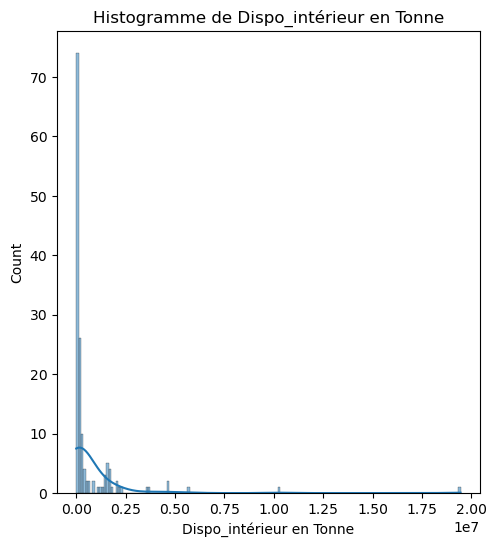

D'après le test de Kolmogorov-Smirnov, la distribution pour Dispo_intérieur en Tonne n'est pas normale.
La distribution pour Dispo_intérieur en Tonne est asymétrique positive.


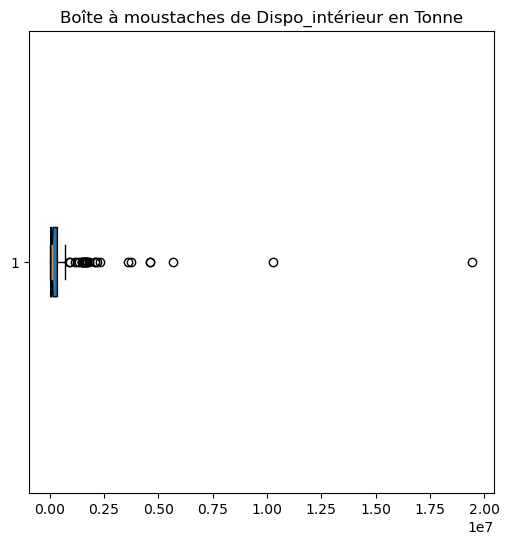

Le minimum (Q0) pour Dispo_intérieur en Tonne est 4000.0
Le premier quartile (Q1) pour Dispo_intérieur en Tonne est 47000.0
Le troisième quartile (Q3) pour Dispo_intérieur en Tonne est 357000.0
Le maximum (Q4) pour Dispo_intérieur en Tonne est 19451000.0
L'écart interquartile (IQR) pour Dispo_intérieur en Tonne is 310000.0
La médiane pour Dispo_intérieur en Tonne est 120000.0


J'ai trouvé des outliers pour Dispo_intérieur en Tonne.
Outliers pour Dispo_intérieur en Tonne :

['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Argentine', 'Australie', 'Brésil', 'Canada', 'Chine', 'Colombie', 'Espagne', 'France', 'Fédération de Russie', 'Inde', 'Indonésie', 'Iran', 'Malaisie', 'Mexique', 'Myanmar', 'Pakistan', 'Philippines', 'Pérou', 'Royaume-Uni', 'Corée du Sud', 'Turquie', 'Viet Nam', 'Égypte', "États-Unis d'Amérique"]

--------------------------------------------------
Je m'apprête à analyser Dispo_Alim_kcal_pers_jour_volaille
--------------------------------------------------


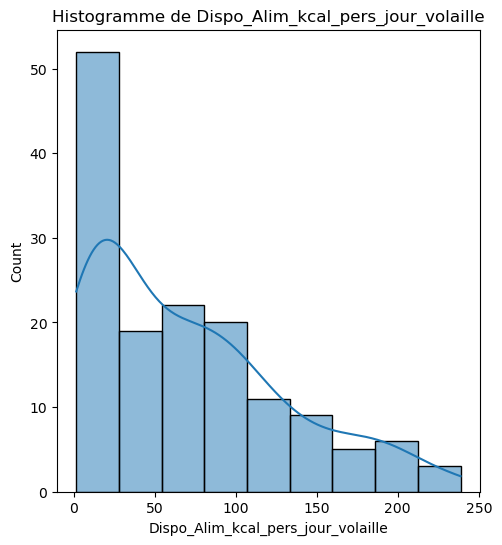

D'après le test de Kolmogorov-Smirnov, la distribution pour Dispo_Alim_kcal_pers_jour_volaille n'est pas normale.
La distribution pour Dispo_Alim_kcal_pers_jour_volaille est asymétrique positive.


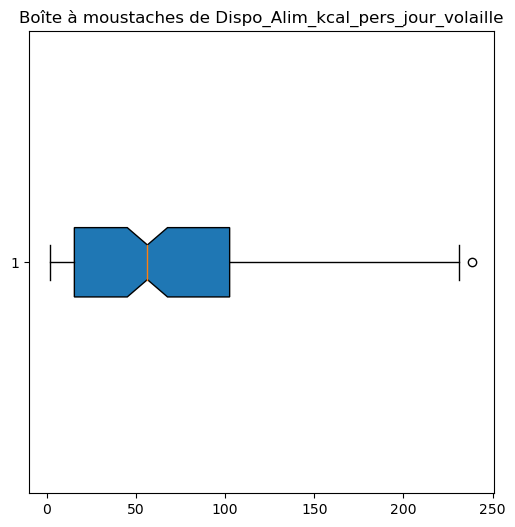

Le minimum (Q0) pour Dispo_Alim_kcal_pers_jour_volaille est 1.63
Le premier quartile (Q1) pour Dispo_Alim_kcal_pers_jour_volaille est 15.440000000000001
Le troisième quartile (Q3) pour Dispo_Alim_kcal_pers_jour_volaille est 102.535
Le maximum (Q4) pour Dispo_Alim_kcal_pers_jour_volaille est 238.71
L'écart interquartile (IQR) pour Dispo_Alim_kcal_pers_jour_volaille is 87.095
La médiane pour Dispo_Alim_kcal_pers_jour_volaille est 56.403999999999996


Pas d'outliers pour Dispo_Alim_kcal_pers_jour_volaille

--------------------------------------------------
Je m'apprête à analyser Dispo_Prot_g_pers_jour_volaille
--------------------------------------------------


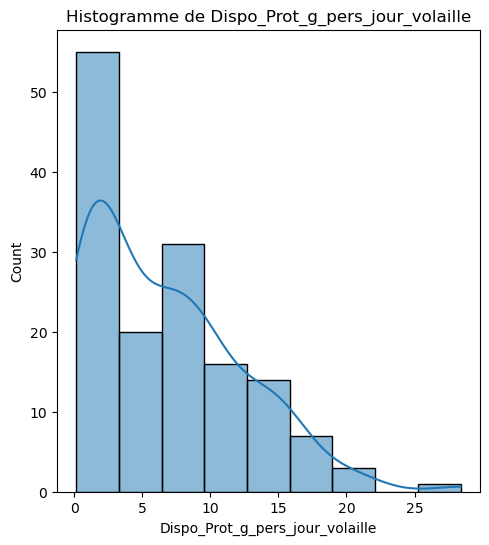

D'après le test de Kolmogorov-Smirnov, la distribution pour Dispo_Prot_g_pers_jour_volaille n'est pas normale.
La distribution pour Dispo_Prot_g_pers_jour_volaille est asymétrique positive.


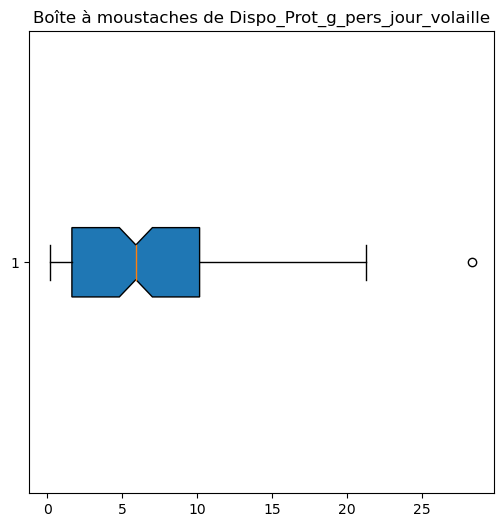

Le minimum (Q0) pour Dispo_Prot_g_pers_jour_volaille est 0.16
Le premier quartile (Q1) pour Dispo_Prot_g_pers_jour_volaille est 1.6400000000000001
Le troisième quartile (Q3) pour Dispo_Prot_g_pers_jour_volaille est 10.165
Le maximum (Q4) pour Dispo_Prot_g_pers_jour_volaille est 28.38
L'écart interquartile (IQR) pour Dispo_Prot_g_pers_jour_volaille is 8.524999999999999
La médiane pour Dispo_Prot_g_pers_jour_volaille est 5.91


J'ai trouvé des outliers pour Dispo_Prot_g_pers_jour_volaille.
Outliers pour Dispo_Prot_g_pers_jour_volaille :

['Israël']

--------------------------------------------------
Je m'apprête à analyser Dispo_Alim_kg_pers_volaille
--------------------------------------------------


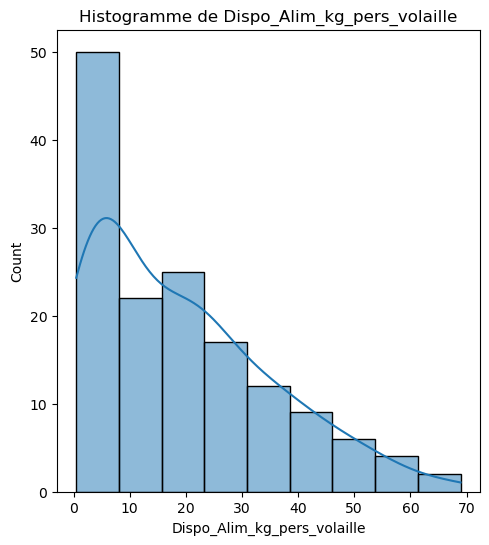

D'après le test de Kolmogorov-Smirnov, la distribution pour Dispo_Alim_kg_pers_volaille n'est pas normale.
La distribution pour Dispo_Alim_kg_pers_volaille est asymétrique positive.


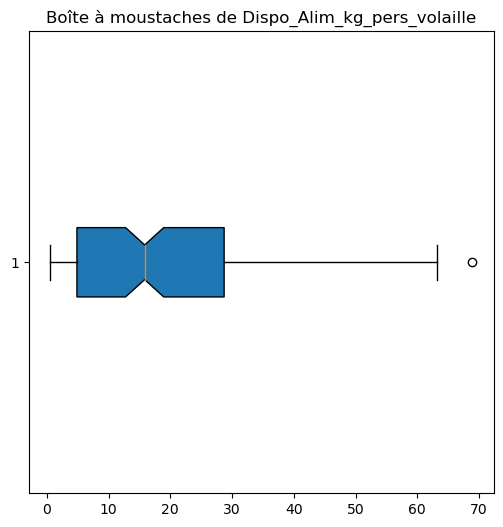

Le minimum (Q0) pour Dispo_Alim_kg_pers_volaille est 0.48
Le premier quartile (Q1) pour Dispo_Alim_kg_pers_volaille est 4.885
Le troisième quartile (Q3) pour Dispo_Alim_kg_pers_volaille est 28.72
Le maximum (Q4) pour Dispo_Alim_kg_pers_volaille est 68.93
L'écart interquartile (IQR) pour Dispo_Alim_kg_pers_volaille is 23.835
La médiane pour Dispo_Alim_kg_pers_volaille est 15.85


Pas d'outliers pour Dispo_Alim_kg_pers_volaille

--------------------------------------------------
Je m'apprête à analyser Population 2020
--------------------------------------------------


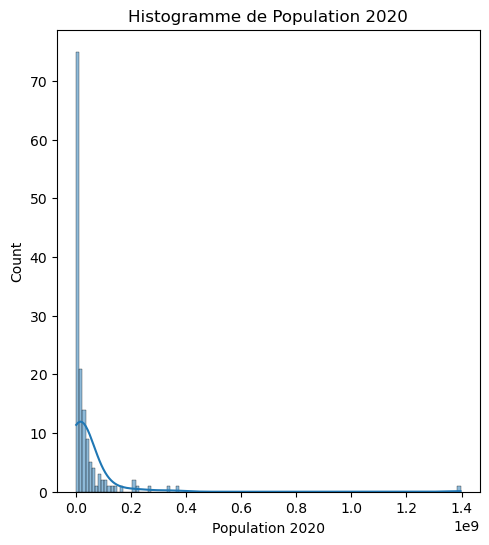

D'après le test de Kolmogorov-Smirnov, la distribution pour Population 2020 n'est pas normale.
La distribution pour Population 2020 est asymétrique positive.


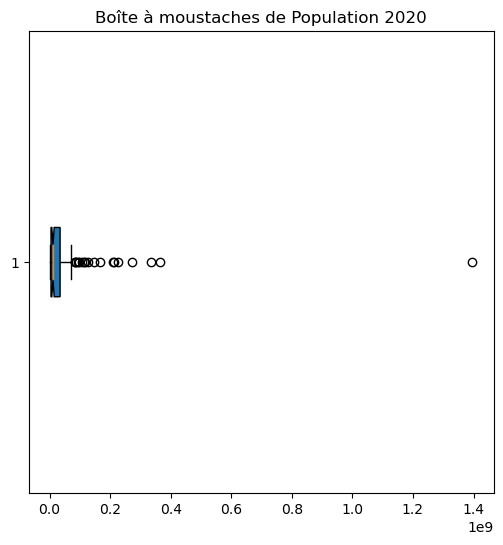

Le minimum (Q0) pour Population 2020 est 514438.0
Le premier quartile (Q1) pour Population 2020 est 4744759.0
Le troisième quartile (Q3) pour Population 2020 est 34761881.5
Le maximum (Q4) pour Population 2020 est 1396387127.0
L'écart interquartile (IQR) pour Population 2020 is 30017122.5
La médiane pour Population 2020 est 11306801.0


J'ai trouvé des outliers pour Population 2020.
Outliers pour Population 2020 :

['Bangladesh', 'Brésil', 'Chine', 'Fédération de Russie', 'Inde', 'Indonésie', 'Mexique', 'Nigéria', 'Pakistan', 'Philippines', 'Viet Nam', 'Égypte', "États-Unis d'Amérique", 'Éthiopie']

--------------------------------------------------
Je m'apprête à analyser PIB par habitant $
--------------------------------------------------


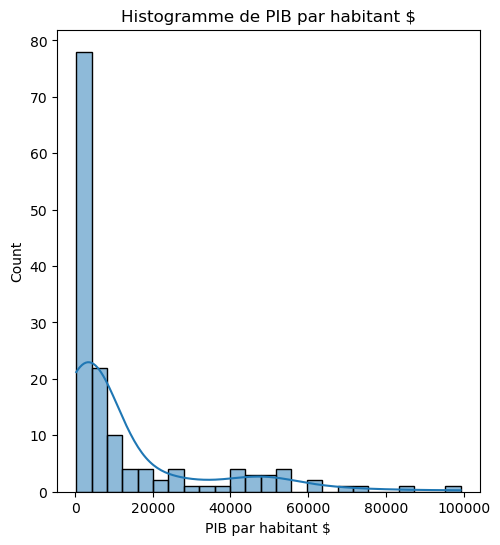

D'après le test de Kolmogorov-Smirnov, la distribution pour PIB par habitant $ n'est pas normale.
La distribution pour PIB par habitant $ est asymétrique positive.


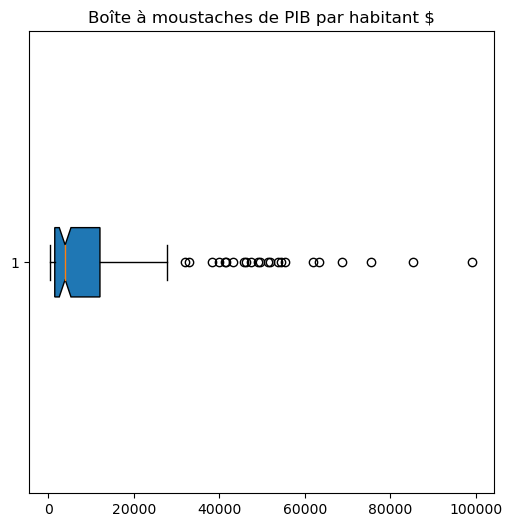

Le minimum (Q0) pour PIB par habitant $ est 291.9733605
Le premier quartile (Q1) pour PIB par habitant $ est 1468.04458875
Le troisième quartile (Q3) pour PIB par habitant $ est 12046.926639000001
Le maximum (Q4) pour PIB par habitant $ est 99218.3767585
L'écart interquartile (IQR) pour PIB par habitant $ is 10578.882050250002
La médiane pour PIB par habitant $ est 3895.5740860000005


J'ai trouvé des outliers pour PIB par habitant $.
Outliers pour PIB par habitant $ :

['Allemagne', 'Australie', 'Autriche', 'Belgique', 'Canada', 'Chine', 'Danemark', 'Finlande', 'France', 'Irlande', 'Israël', 'Luxembourg', 'Norvège', 'Nouvelle-Zélande', 'Pays-Bas', 'Qatar', 'Royaume-Uni', 'Singapour', 'Suisse', 'Suède', 'Émirats arabes unis', "États-Unis d'Amérique"]

--------------------------------------------------
Je m'apprête à analyser Qté poulets exporté en nb de tete
--------------------------------------------------


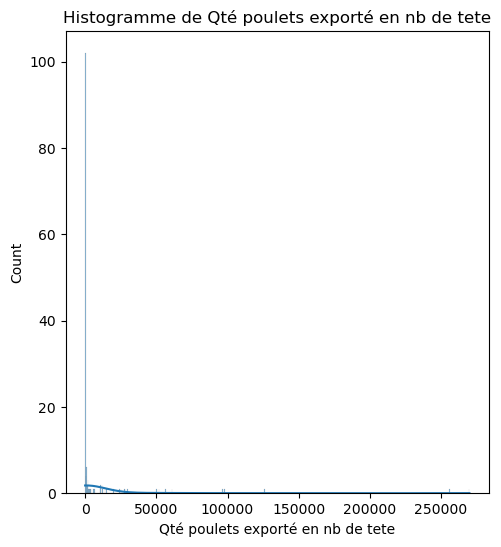

D'après le test de Kolmogorov-Smirnov, la distribution pour Qté poulets exporté en nb de tete n'est pas normale.
La distribution pour Qté poulets exporté en nb de tete est asymétrique positive.


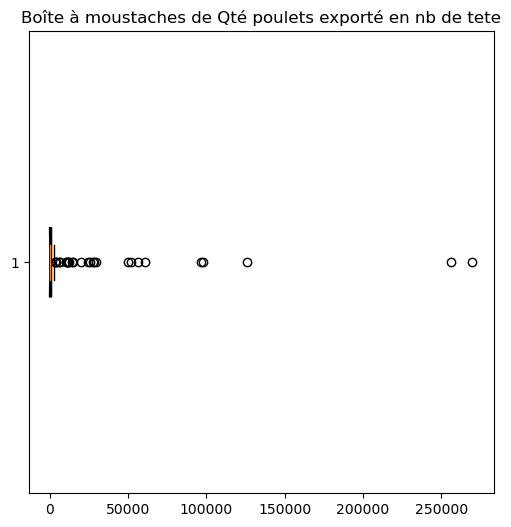

Le minimum (Q0) pour Qté poulets exporté en nb de tete est 0.0
Le premier quartile (Q1) pour Qté poulets exporté en nb de tete est 0.0
Le troisième quartile (Q3) pour Qté poulets exporté en nb de tete est 1179.0
Le maximum (Q4) pour Qté poulets exporté en nb de tete est 269877.0
L'écart interquartile (IQR) pour Qté poulets exporté en nb de tete is 1179.0
La médiane pour Qté poulets exporté en nb de tete est 4.0


J'ai trouvé des outliers pour Qté poulets exporté en nb de tete.
Outliers pour Qté poulets exporté en nb de tete :

['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Autriche', 'Belgique', 'Brésil', 'Costa Rica', 'Cuba', 'Danemark', 'El Salvador', 'Espagne', 'Finlande', 'France', 'Fédération de Russie', 'Guatemala', 'Malaisie', 'Ouzbékistan', 'Pakistan', 'Pays-Bas', 'Royaume-Uni', 'République centrafricaine', 'Slovaquie', 'Suède', 'Tchéquie', 'Thaïlande', 'Turquie', "États-Unis d'Amérique"]

--------------------------------------------------
Je m'apprête à analyser Valeur ex

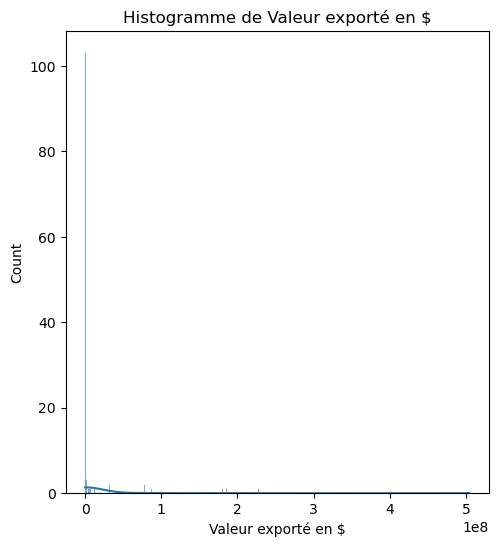

D'après le test de Kolmogorov-Smirnov, la distribution pour Valeur exporté en $ n'est pas normale.
La distribution pour Valeur exporté en $ est asymétrique positive.


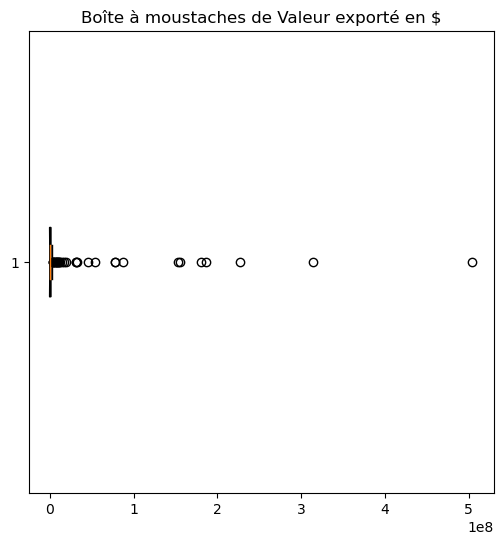

Le minimum (Q0) pour Valeur exporté en $ est 0.0
Le premier quartile (Q1) pour Valeur exporté en $ est 0.0
Le troisième quartile (Q3) pour Valeur exporté en $ est 1494000.0
Le maximum (Q4) pour Valeur exporté en $ est 504633000.0
L'écart interquartile (IQR) pour Valeur exporté en $ is 1494000.0
La médiane pour Valeur exporté en $ est 11000.0


J'ai trouvé des outliers pour Valeur exporté en $.
Outliers pour Valeur exporté en $ :

['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Autriche', 'Belgique', 'Brésil', 'Canada', 'Costa Rica', 'Cuba', 'Danemark', 'El Salvador', 'Espagne', 'Finlande', 'France', 'Fédération de Russie', 'Malaisie', 'Nouvelle-Zélande', 'Pakistan', 'Pays-Bas', 'Royaume-Uni', 'République centrafricaine', 'Slovaquie', 'Suède', 'Tchéquie', 'Thaïlande', 'Turquie', 'Zambie', "États-Unis d'Amérique"]

--------------------------------------------------
Je m'apprête à analyser Qté poulets importé en nb de tete
--------------------------------------------------


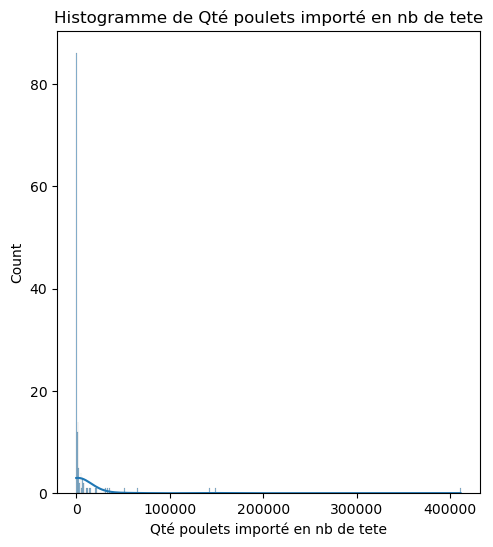

D'après le test de Kolmogorov-Smirnov, la distribution pour Qté poulets importé en nb de tete n'est pas normale.
La distribution pour Qté poulets importé en nb de tete est asymétrique positive.


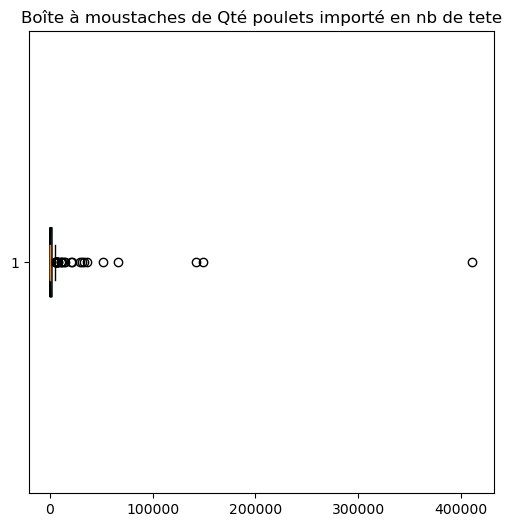

Le minimum (Q0) pour Qté poulets importé en nb de tete est 0.0
Le premier quartile (Q1) pour Qté poulets importé en nb de tete est 140.0
Le troisième quartile (Q3) pour Qté poulets importé en nb de tete est 2222.0
Le maximum (Q4) pour Qté poulets importé en nb de tete est 410911.0
L'écart interquartile (IQR) pour Qté poulets importé en nb de tete is 2082.0
La médiane pour Qté poulets importé en nb de tete est 520.0


J'ai trouvé des outliers pour Qté poulets importé en nb de tete.
Outliers pour Qté poulets importé en nb de tete :

['Afghanistan', 'Allemagne', 'Autriche', 'Belgique', 'Canada', 'Cuba', 'Espagne', 'France', 'Ghana', 'Guatemala', 'Irlande', 'Mongolie', 'Myanmar', 'Nicaragua', 'Paraguay', 'Pays-Bas', 'Royaume-Uni', 'République centrafricaine', 'Singapour', 'Slovaquie', 'Slovénie', 'Tchéquie', 'Viet Nam']

--------------------------------------------------
Je m'apprête à analyser Valeur importé en $
--------------------------------------------------


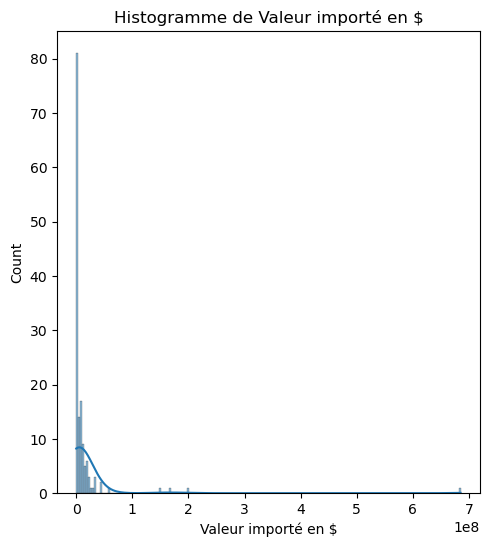

D'après le test de Kolmogorov-Smirnov, la distribution pour Valeur importé en $ n'est pas normale.
La distribution pour Valeur importé en $ est asymétrique positive.


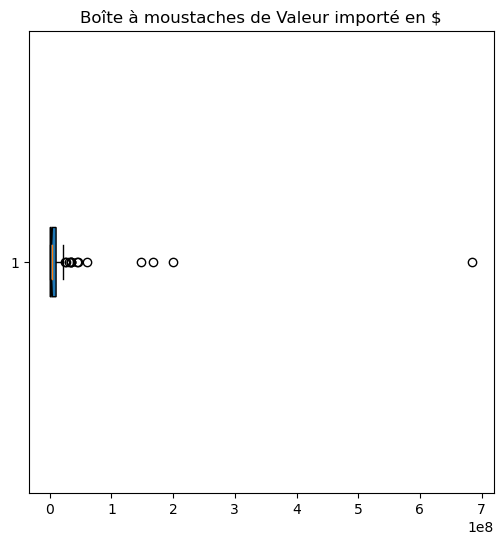

Le minimum (Q0) pour Valeur importé en $ est 0.0
Le premier quartile (Q1) pour Valeur importé en $ est 773500.0
Le troisième quartile (Q3) pour Valeur importé en $ est 10281500.0
Le maximum (Q4) pour Valeur importé en $ est 685167000.0
L'écart interquartile (IQR) pour Valeur importé en $ is 9508000.0
La médiane pour Valeur importé en $ est 3084000.0


J'ai trouvé des outliers pour Valeur importé en $.
Outliers pour Valeur importé en $ :

['Allemagne', 'Autriche', 'Belgique', 'Canada', 'Cuba', 'Espagne', 'France', 'Indonésie', 'Pays-Bas', 'Singapour', 'Slovaquie']

--------------------------------------------------
Je m'apprête à analyser Qté de production poulets
--------------------------------------------------


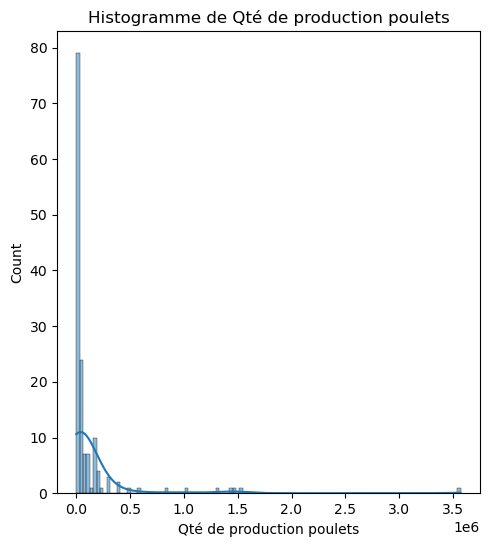

D'après le test de Kolmogorov-Smirnov, la distribution pour Qté de production poulets n'est pas normale.
La distribution pour Qté de production poulets est asymétrique positive.


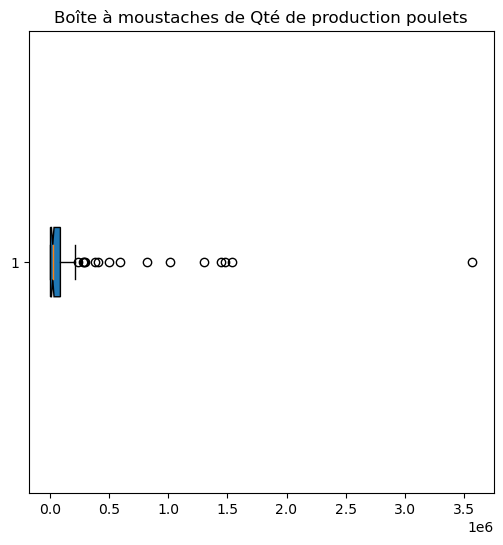

Le minimum (Q0) pour Qté de production poulets est 136.0
Le premier quartile (Q1) pour Qté de production poulets est 6561.0
Le troisième quartile (Q3) pour Qté de production poulets est 90243.0
Le maximum (Q4) pour Qté de production poulets est 3570142.0
L'écart interquartile (IQR) pour Qté de production poulets is 83682.0
La médiane pour Qté de production poulets est 25704.0


J'ai trouvé des outliers pour Qté de production poulets.
Outliers pour Qté de production poulets :

['Bangladesh', 'Brésil', 'Chine', 'Fédération de Russie', 'Inde', 'Indonésie', 'Iran', 'Malaisie', 'Mexique', 'Pakistan', 'Thaïlande', 'Turquie', 'Viet Nam', "États-Unis d'Amérique"]


C:\Users\M710q\AppData\Local\Temp\ipykernel_16732\3650387932.py:84: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='spearman')


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, skew

from scipy.stats import skew

# Je prends mon DataFrame et je le stocke dans une nouvelle variable.
df = df_filtré

# Je décide de supprimer une colonne qui ne sera pas utile pour mon analyse.
df = df.drop(columns=['Evol Population 2010-2020 en %'])

# Ensuite, je crée une copie de mon DataFrame pour effectuer les nettoyages nécessaires.
df_clean = df.copy()

# Je supprime les valeurs infinies et NaN pour obtenir des données propres.
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean.dropna(inplace=True)

# Je vais maintenant effectuer une analyse univariée sur chaque colonne numérique dans mon DataFrame.
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"\n{'-'*50}\nJe m'apprête à analyser {col}\n{'-'*50}")

    # Je commence par créer un histogramme pour visualiser la distribution de la colonne.
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogramme de {col}')
    plt.show()

    # Ensuite, je teste si la distribution est normale en utilisant le test de Kolmogorov-Smirnov.
    stat, p = kstest(df[col], 'norm')

    # Si la p-value est inférieure à 0.05, cela signifie que ma distribution n'est pas normale.
    if p < 0.05:
        print(f"D'après le test de Kolmogorov-Smirnov, la distribution pour {col} n'est pas normale.")

    # Ensuite, je teste l'asymétrie de ma distribution. Si la valeur d'asymétrie est positive, la distribution est asymétrique positive. Sinon, elle est asymétrique négative.
    skewness = skew(df[col])
    if skewness > 0:
        print(f"La distribution pour {col} est asymétrique positive.")
    elif skewness < 0:
        print(f"La distribution pour {col} est asymétrique négative.")

    # Enfin, je crée une boîte à moustaches pour visualiser les outliers et je calcule les statistiques descriptives pour cette colonne.
    plt.figure(figsize=(6,6))
    box_plot = plt.boxplot(df[col], patch_artist=True, notch=True, vert=0)
    plt.title(f'Boîte à moustaches de {col}')
    plt.show()

    # Je calcule aussi les quartiles et l'écart interquartile pour cette colonne.
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    median = df[col].median()
    Q0 = df[col].min()  # minimum
    Q4 = df[col].max()  # maximum

    print(f'Le minimum (Q0) pour {col} est {Q0}')
    print(f'Le premier quartile (Q1) pour {col} est {Q1}')
    print(f'Le troisième quartile (Q3) pour {col} est {Q3}')
    print(f'Le maximum (Q4) pour {col} est {Q4}')
    print(f"L'écart interquartile (IQR) pour {col} is {IQR}")
    print(f'La médiane pour {col} est {median}\n\n')

    # Je cherche les outliers en utilisant la règle de 1.95* l'écart interquartile.
    outliers = df[(df[col] < (Q1 - 1.95 * IQR)) | (df[col] > (Q3 + 1.95 * IQR))]
    if not outliers.empty:
        print(f"J'ai trouvé des outliers pour {col}.")
        print(f"Outliers pour {col} :\n")
        print(list(outliers['Zone']))
    else:
        print(f"Pas d'outliers pour {col}")

# Pour chaque colonne numérique, je vérifie la normalité de sa distribution. 
# En fonction de cela, j'utilise la corrélation de Pearson (pour une distribution normale) ou Spearman (pour une distribution non normale).
for col in df.select_dtypes(include=[np.number]).columns:
    stat, p = kstest(df[col], 'norm')
    if p > 0.05:  # si la distribution est normale
        corr_matrix = df.corr(method='pearson') 
    else:  # si la distribution n'est pas normale
        corr_matrix = df.corr(method='spearman') 


                

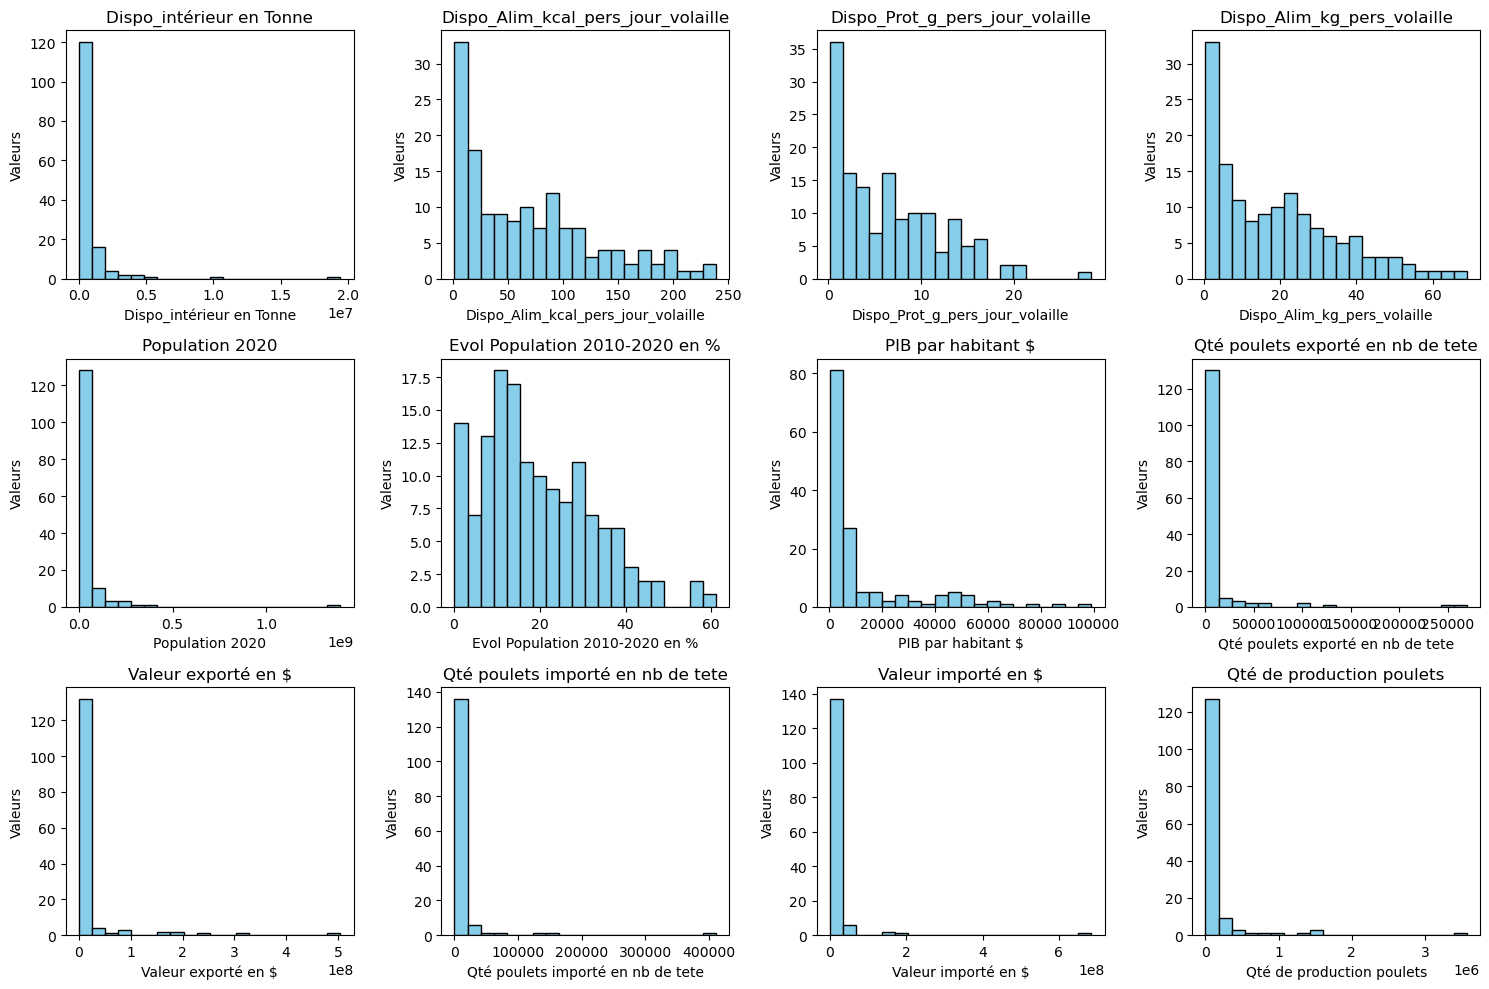

,Dispo_intérieur en Tonne,Dispo_Alim_kcal_pers_jour_volaille,Dispo_Prot_g_pers_jour_volaille,Dispo_Alim_kg_pers_volaille,Population 2020,Evol Population 2010-2020 en %,PIB par habitant $,Qté poulets exporté en nb de tete,Valeur exporté en $,Qté poulets importé en nb de tete,Valeur importé en $,Qté de production poulets
count,1.470000e+02,147.000000,147.000000,147.000000,1.470000e+02,147.000000,147.000000,147.000000,1.470000e+02,147.000000,1.470000e+02,1.470000e+02
mean,6.955435e+05,69.240888,6.648701,19.009993,4.298644e+07,19.175476,12778.264212,9315.145578,1.588990e+07,8295.815986,1.503811e+07,1.365180e+05
std,1.990175e+06,59.863011,5.617440,15.926726,1.269065e+08,12.975118,19499.516856,34914.389972,5.923703e+07,38356.113681,6.125294e+07,3.876911e+05
min,4.000000e+03,1.630000,0.160000,0.480000,5.144380e+05,0.100000,291.973361,0.000000,0.000000e+00,0.000000,0.000000e+00,1.360000e+02
25%,4.700000e+04,15.440000,1.640000,4.885000,4.744759e+06,9.500000,1468.044589,0.000000,0.000000e+00,140.000000,7.735000e+05,6.561000e+03
50%,1.200000e+05,56.404000,5.910000,15.850000,1.130680e+07,16.400000,3895.574086,4.000000,1.100000e+04,520.000000,3.084000e+06,2.570400e+04
75%,3.570000e+05,102.535000,10.165000,28.720000,3.476188e+07,28.500000,12046.926639,1179.000000,1.494000e+06,2222.000000,1.028150e+07,9.024300e+04
max,1.945100e+07,238.710000,28.380000,68.930000,1.396387e+09,61.100000,99218.376759,269877.000000,5.046330e+08,410911.000000,6.851670e+08,3.570142e+06


In [20]:
# Je réalise des statistiques de base pour comprendre les données
basic_stats = df_filtré.describe()

# Je prépare la visualisation : des histogrammes pour chaque variable afin de comprendre leur distribution
import matplotlib.pyplot as plt

# Je sélectionne les colonnes numériques pour la visualisation
numerical_columns = df_filtré.select_dtypes(include=['float64']).columns

# Je trace les histogrammes
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    plt.hist(df_filtré[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Valeurs')

# Je m'assure que les graphiques sont bien agencés
plt.tight_layout()

# Je montre les graphiques
plt.show()

# Je retourne les statistiques de base
basic_stats


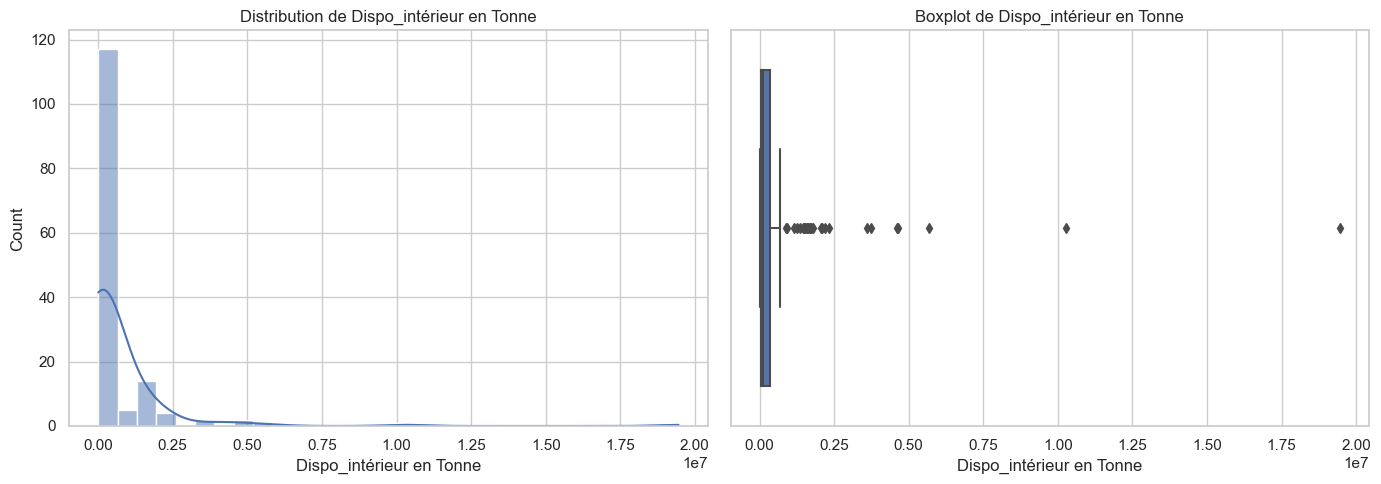

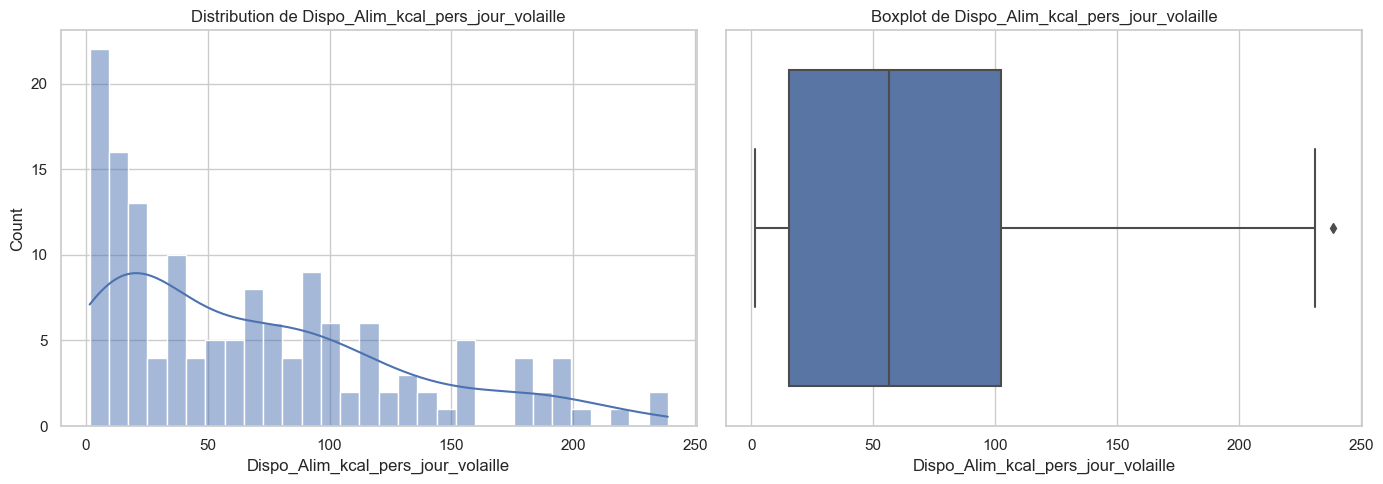

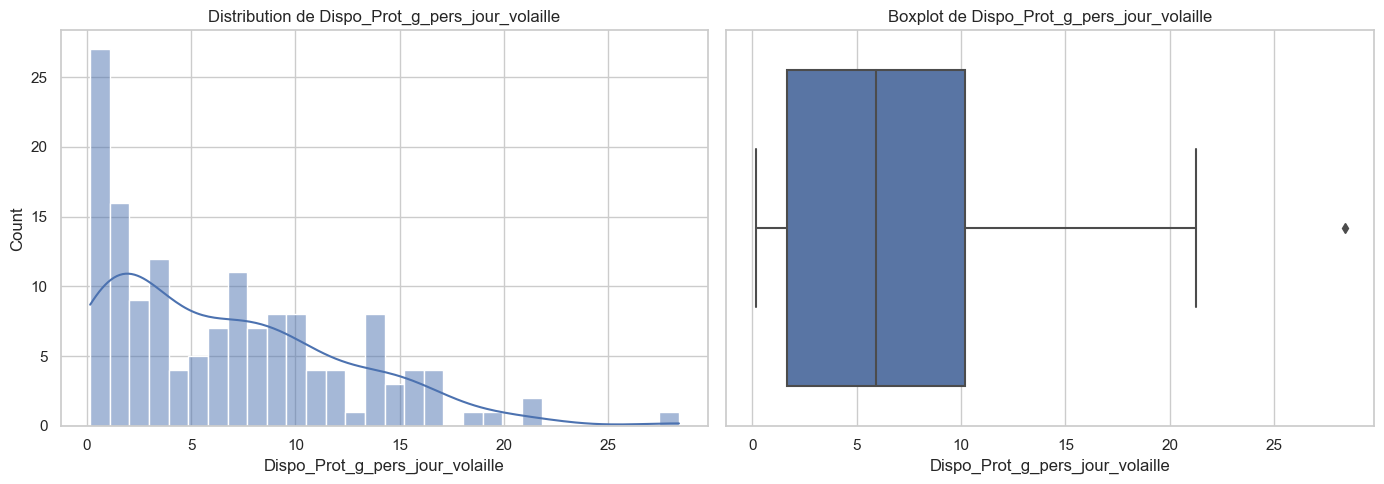

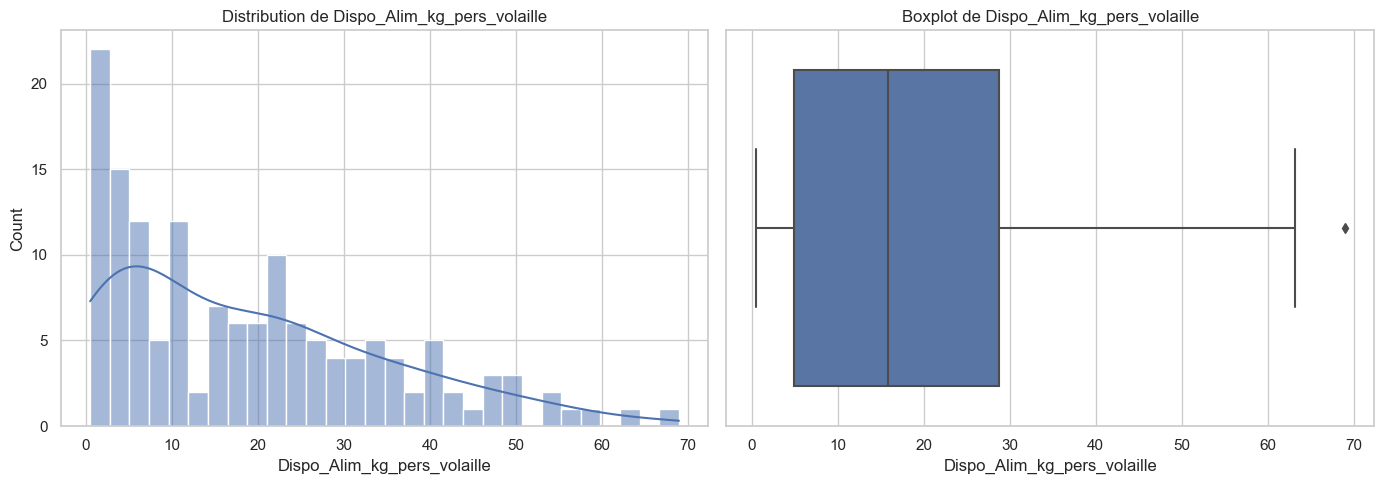

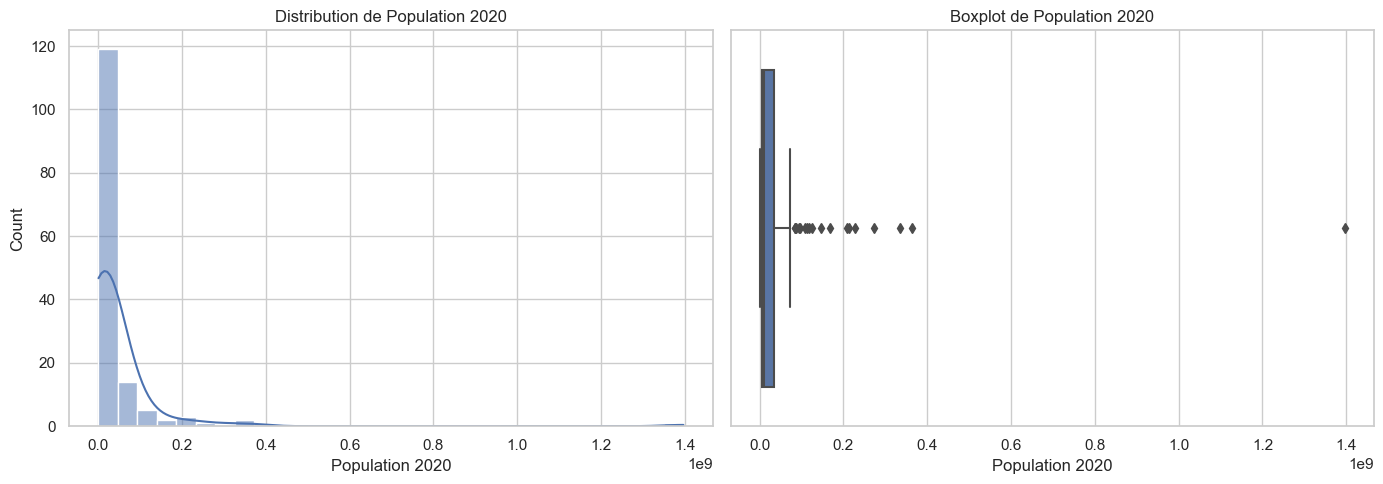

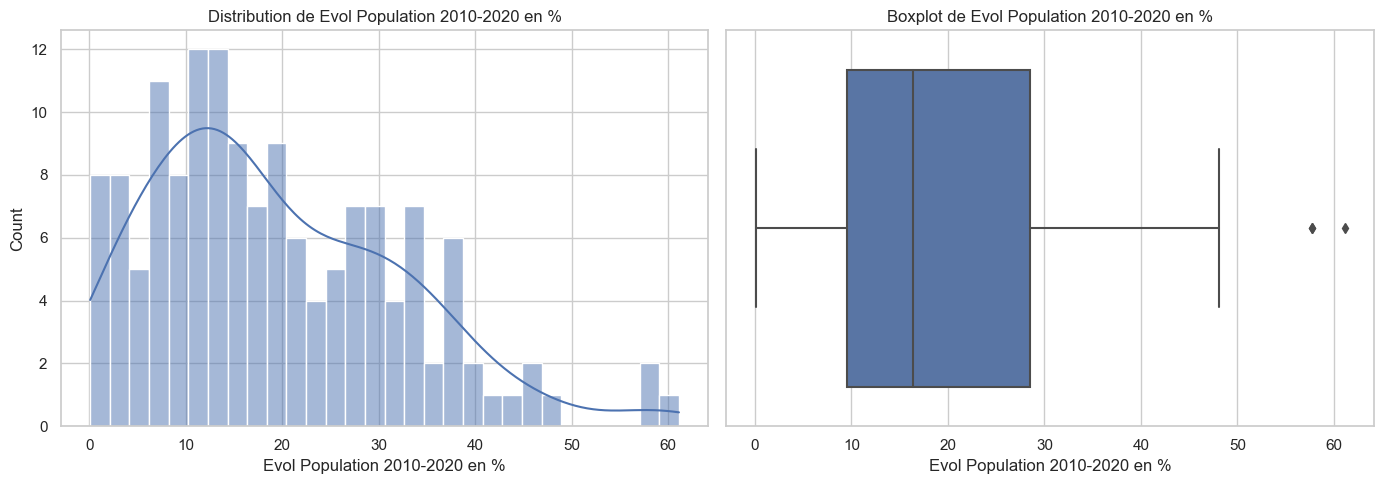

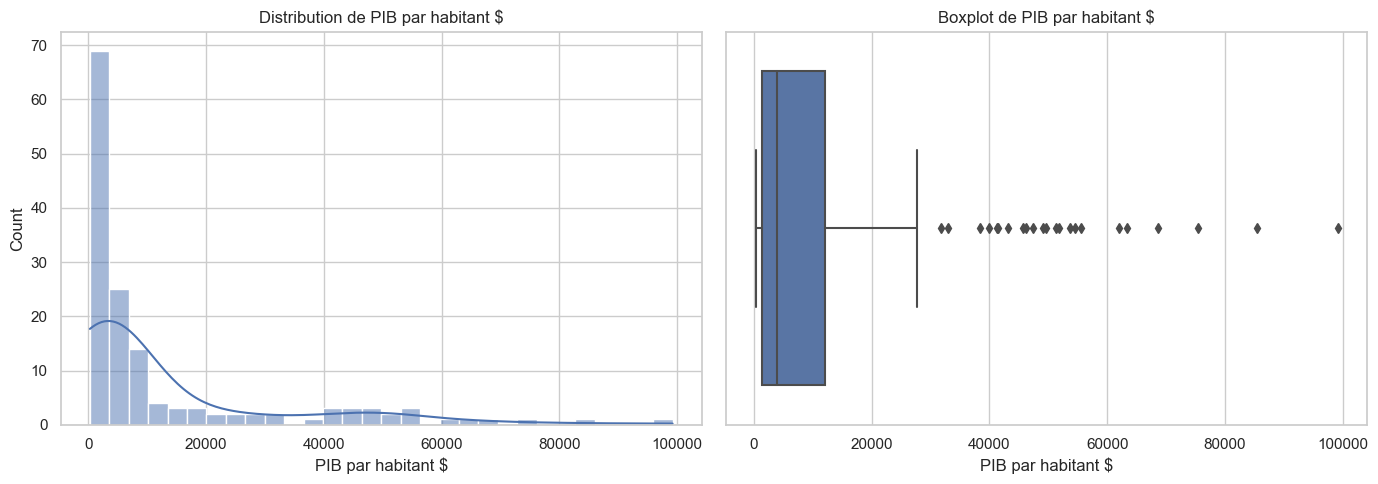

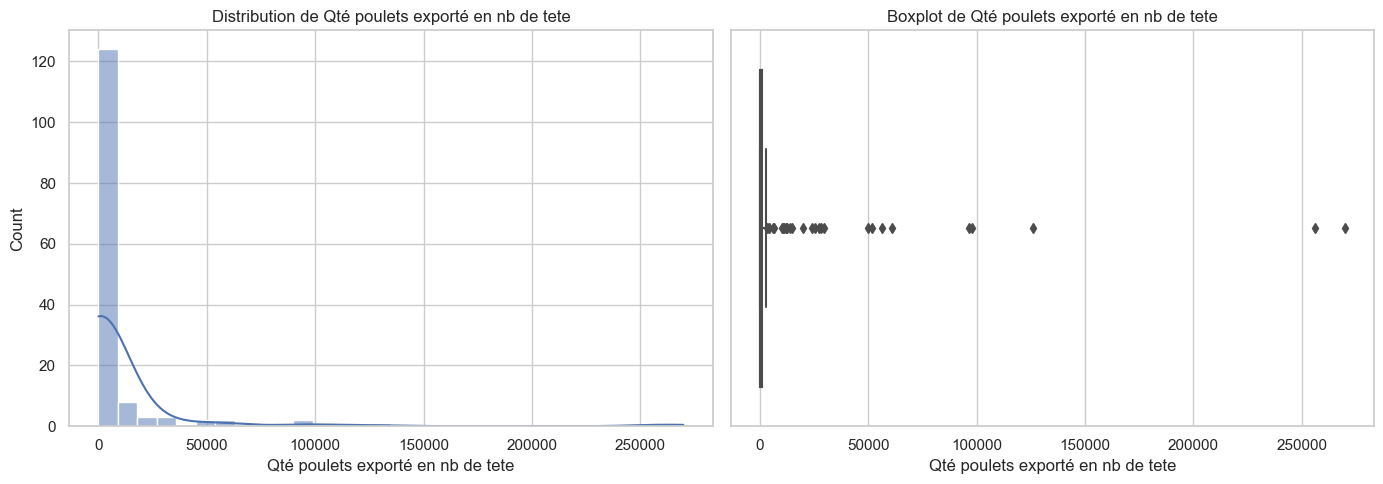

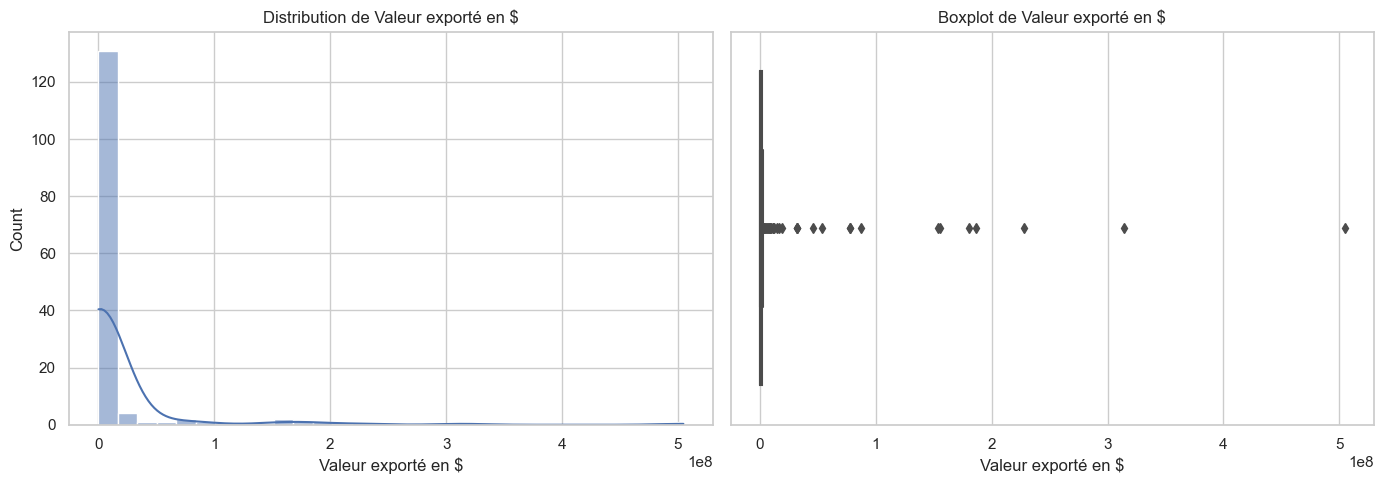

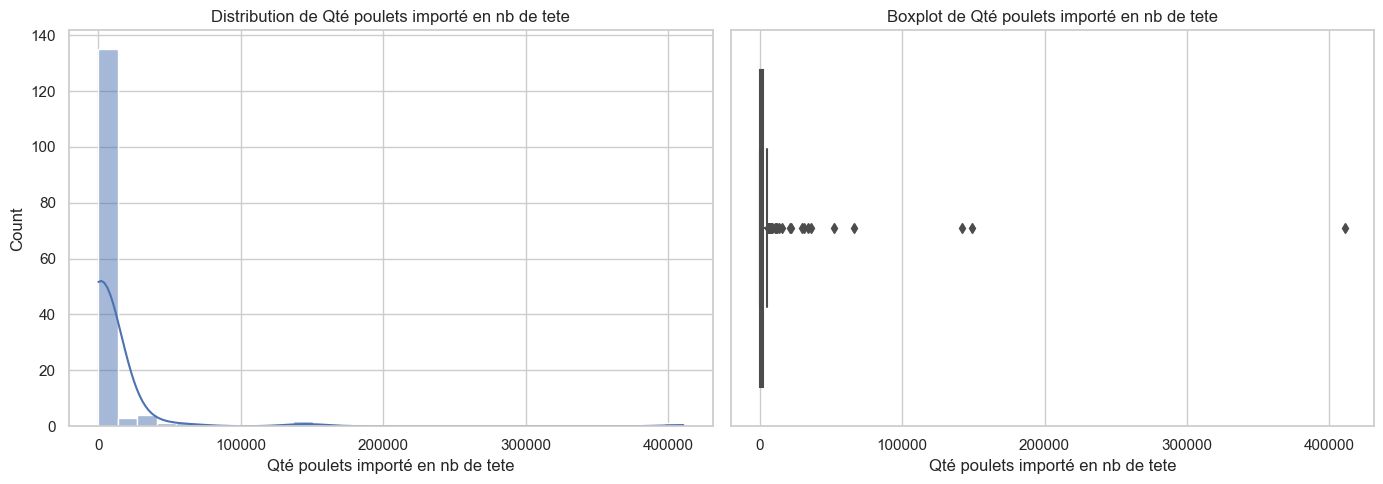

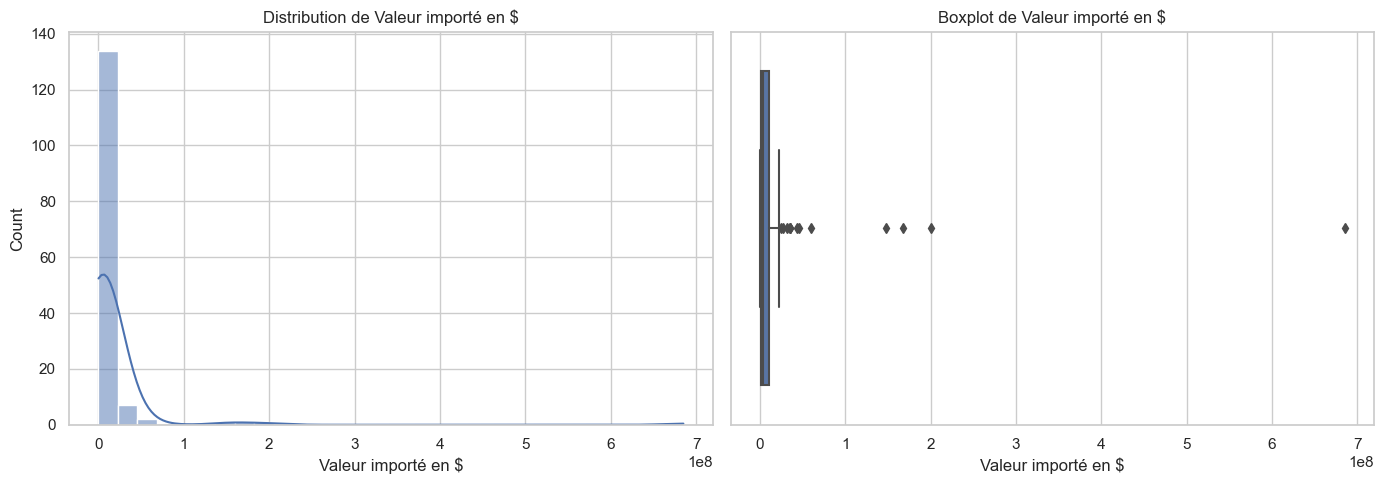

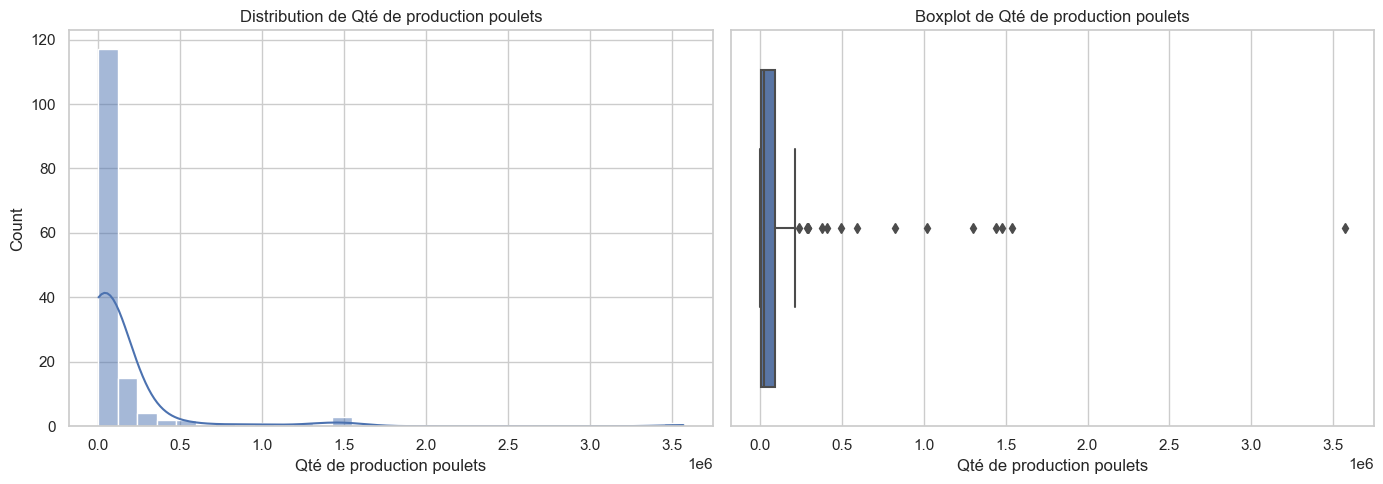

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer le style de Seaborn
sns.set(style="whitegrid")

# Liste des colonnes numériques à analyser

numerical_columns = df_filtré.select_dtypes(include=['float64']).columns

# Création des graphiques de distribution et des boxplots pour chaque variable numérique
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Graphique de distribution
    sns.histplot(df_filtré[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution de {col}')
    
    # Boxplot
    sns.boxplot(x=df_filtré[col], ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()


Après avoir examiné les statistiques descriptives et les distributions de chaque variable, plusieurs observations peuvent être faites :

1. **Dispo_intérieur en Tonne** : La distribution est fortement asymétrique, avec quelques pays ayant une disponibilité intérieure très élevée.
2. **Dispo_Alim_kcal_pers_jour_volaille** : Cette variable a également une distribution asymétrique, indiquant que la consommation de volaille varie considérablement entre les pays.
3. **Population 2020** : Comme prévu, la population a une distribution très asymétrique, avec quelques pays densément peuplés.
4. **PIB par habitant $** : Cette variable est également fortement asymétrique, avec quelques pays ayant un PIB par habitant très élevé.
5. **Valeur exporté/importé en $** : Ces variables sont également très asymétriques, indiquant que quelques pays dominent le commerce de la volaille.

Ces observations initiales sont importantes car elles peuvent influencer le choix de la méthode de clustering et de la manière dont les variables sont préparées pour l'analyse. Par exemple, en raison de la nature asymétrique de plusieurs variables, une standardisation pourrait être nécessaire avant le clustering.


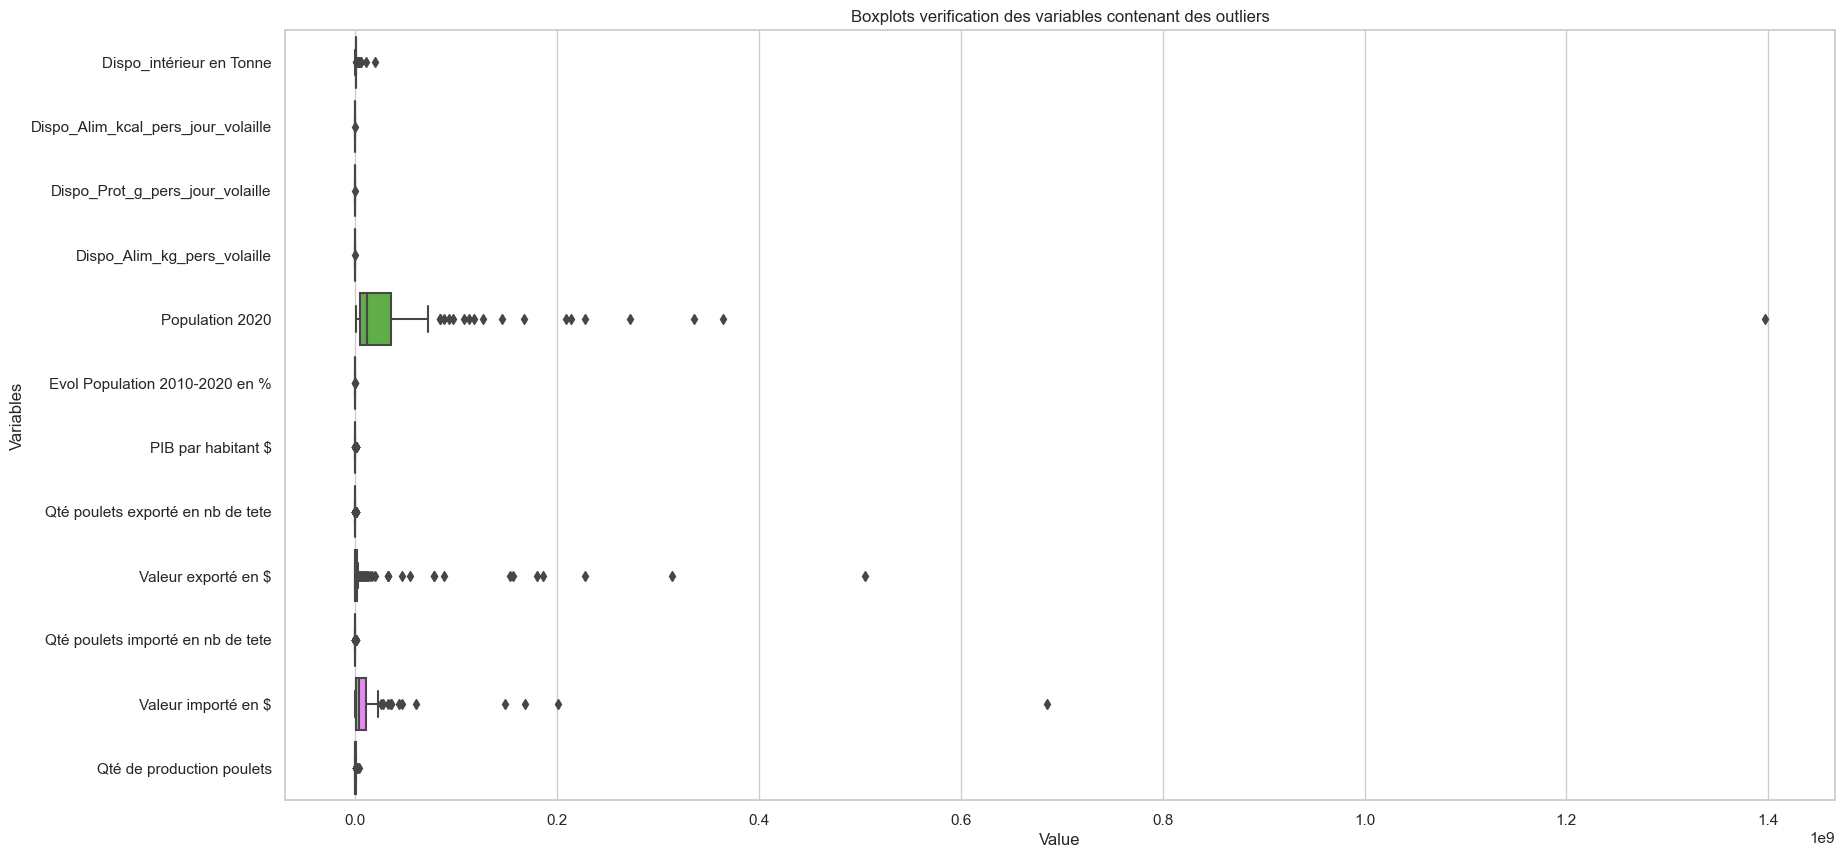

In [22]:



# Plot boxplots pour identifier les outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_filtré.drop(columns=['Zone']), orient='h')
plt.title('Boxplots verification des variables contenant des outliers')
plt.xlabel('Value')
plt.ylabel('Variables')
plt.show()


#### Analyse bivariée


--------------------------------------------------
Analyse bivariée pour Dispo_intérieur en Tonne
--------------------------------------------------


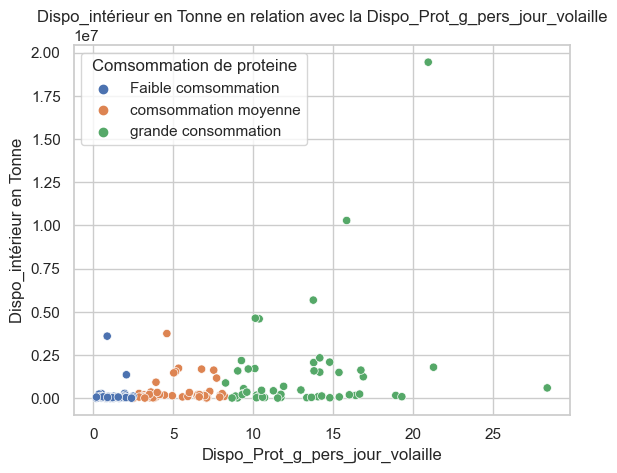

Test de Kruskal-Wallis: Statistiques=33.385, p=0.00000
Corrélation avec Dispo_Prot_g_pers_jour_volaille : 0.49
Il existe une différence significative de comsommation de proteine de volaille pour la variable Dispo_intérieur en Tonne.
Les différences dans Dispo_intérieur en Tonne de comsommation de proteine de volaille ne sont pas dues au hasard,
mais sont statistiquement significatives.
Cela suggère que la variable Dispo_intérieur en Tonne est influencée par la comsommation de proteine de volaille.

--------------------------------------------------
Analyse bivariée pour Dispo_Alim_kcal_pers_jour_volaille
--------------------------------------------------


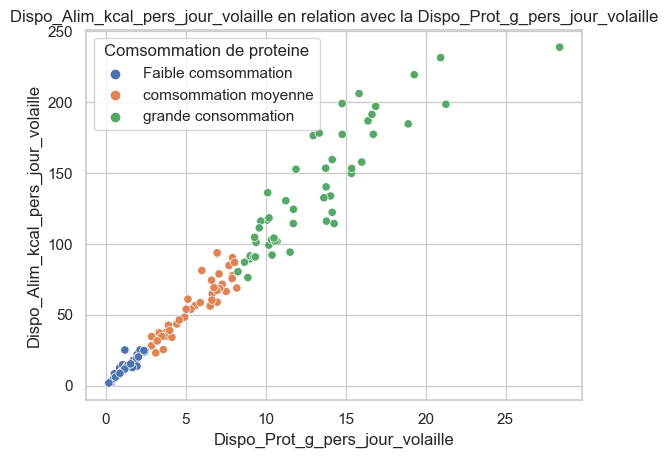

Test de Kruskal-Wallis: Statistiques=126.927, p=0.00000
Corrélation avec Dispo_Prot_g_pers_jour_volaille : 0.99
Il existe une différence significative de comsommation de proteine de volaille pour la variable Dispo_Alim_kcal_pers_jour_volaille.
Les différences dans Dispo_Alim_kcal_pers_jour_volaille de comsommation de proteine de volaille ne sont pas dues au hasard,
mais sont statistiquement significatives.
Cela suggère que la variable Dispo_Alim_kcal_pers_jour_volaille est influencée par la comsommation de proteine de volaille.

--------------------------------------------------
Analyse bivariée pour Dispo_Prot_g_pers_jour_volaille
--------------------------------------------------


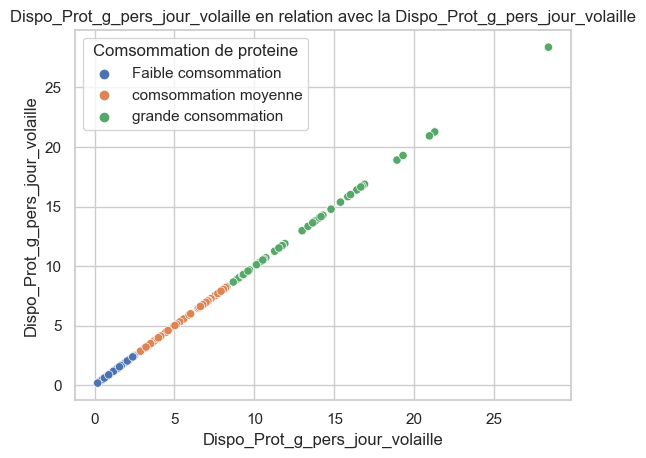

Test de Kruskal-Wallis: Statistiques=128.880, p=0.00000
Corrélation avec Dispo_Prot_g_pers_jour_volaille : 1.00
Il existe une différence significative de comsommation de proteine de volaille pour la variable Dispo_Prot_g_pers_jour_volaille.
Les différences dans Dispo_Prot_g_pers_jour_volaille de comsommation de proteine de volaille ne sont pas dues au hasard,
mais sont statistiquement significatives.
Cela suggère que la variable Dispo_Prot_g_pers_jour_volaille est influencée par la comsommation de proteine de volaille.

--------------------------------------------------
Analyse bivariée pour Dispo_Alim_kg_pers_volaille
--------------------------------------------------


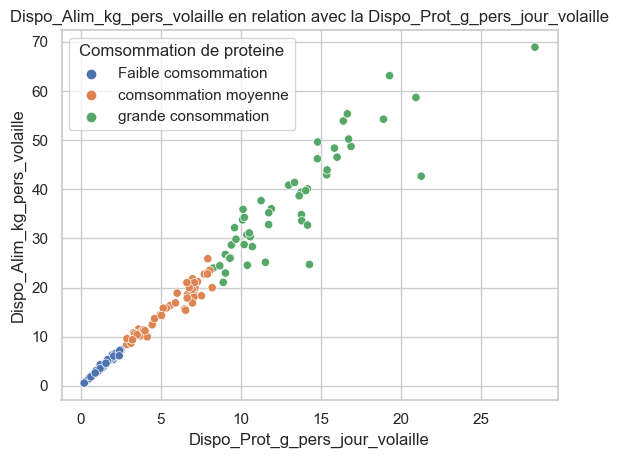

Test de Kruskal-Wallis: Statistiques=127.952, p=0.00000
Corrélation avec Dispo_Prot_g_pers_jour_volaille : 0.99
Il existe une différence significative de comsommation de proteine de volaille pour la variable Dispo_Alim_kg_pers_volaille.
Les différences dans Dispo_Alim_kg_pers_volaille de comsommation de proteine de volaille ne sont pas dues au hasard,
mais sont statistiquement significatives.
Cela suggère que la variable Dispo_Alim_kg_pers_volaille est influencée par la comsommation de proteine de volaille.

--------------------------------------------------
Analyse bivariée pour Population 2020
--------------------------------------------------


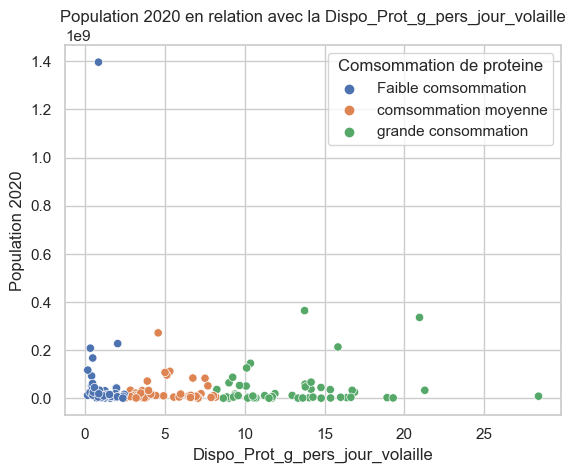

Test de Kruskal-Wallis: Statistiques=3.956, p=0.13832
Corrélation avec Dispo_Prot_g_pers_jour_volaille : -0.17
Il n'existe pas de différence significativede comsommation de proteine de volaille pour la variable Population 2020.
Les variations observées dans Population 2020 entre les groupes peuvent être attribuées au hasard.
Cela suggère que la variable Population 2020 n'est pas fortement influencée par la de comsommation de proteine de volaille.

--------------------------------------------------
Analyse bivariée pour PIB par habitant $
--------------------------------------------------


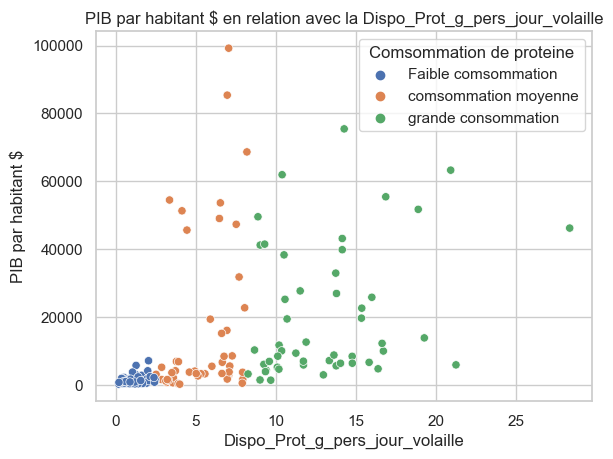

Test de Kruskal-Wallis: Statistiques=70.612, p=0.00000
Corrélation avec Dispo_Prot_g_pers_jour_volaille : 0.73
Il existe une différence significative de comsommation de proteine de volaille pour la variable PIB par habitant $.
Les différences dans PIB par habitant $ de comsommation de proteine de volaille ne sont pas dues au hasard,
mais sont statistiquement significatives.
Cela suggère que la variable PIB par habitant $ est influencée par la comsommation de proteine de volaille.

--------------------------------------------------
Analyse bivariée pour Qté poulets exporté en nb de tete
--------------------------------------------------


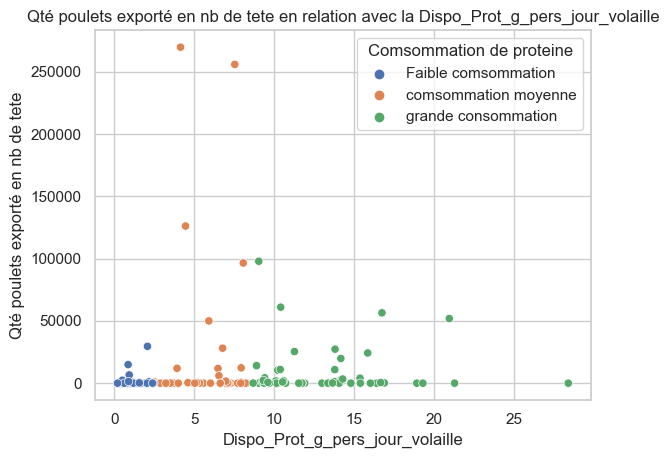

Test de Kruskal-Wallis: Statistiques=8.125, p=0.01721
Corrélation avec Dispo_Prot_g_pers_jour_volaille : 0.24
Il existe une différence significative de comsommation de proteine de volaille pour la variable Qté poulets exporté en nb de tete.
Les différences dans Qté poulets exporté en nb de tete de comsommation de proteine de volaille ne sont pas dues au hasard,
mais sont statistiquement significatives.
Cela suggère que la variable Qté poulets exporté en nb de tete est influencée par la comsommation de proteine de volaille.

--------------------------------------------------
Analyse bivariée pour Valeur exporté en $
--------------------------------------------------


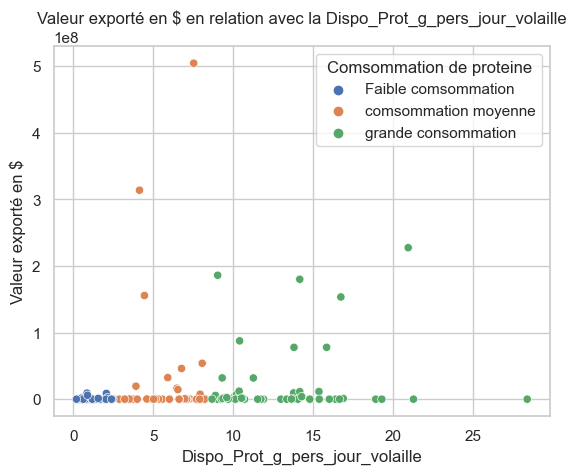

Test de Kruskal-Wallis: Statistiques=9.863, p=0.00721
Corrélation avec Dispo_Prot_g_pers_jour_volaille : 0.26
Il existe une différence significative de comsommation de proteine de volaille pour la variable Valeur exporté en $.
Les différences dans Valeur exporté en $ de comsommation de proteine de volaille ne sont pas dues au hasard,
mais sont statistiquement significatives.
Cela suggère que la variable Valeur exporté en $ est influencée par la comsommation de proteine de volaille.

--------------------------------------------------
Analyse bivariée pour Qté poulets importé en nb de tete
--------------------------------------------------


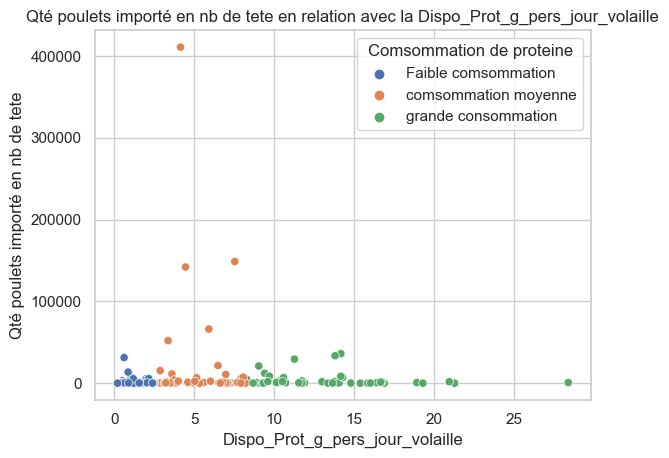

Test de Kruskal-Wallis: Statistiques=3.879, p=0.14377
Corrélation avec Dispo_Prot_g_pers_jour_volaille : 0.09
Il n'existe pas de différence significativede comsommation de proteine de volaille pour la variable Qté poulets importé en nb de tete.
Les variations observées dans Qté poulets importé en nb de tete entre les groupes peuvent être attribuées au hasard.
Cela suggère que la variable Qté poulets importé en nb de tete n'est pas fortement influencée par la de comsommation de proteine de volaille.

--------------------------------------------------
Analyse bivariée pour Valeur importé en $
--------------------------------------------------


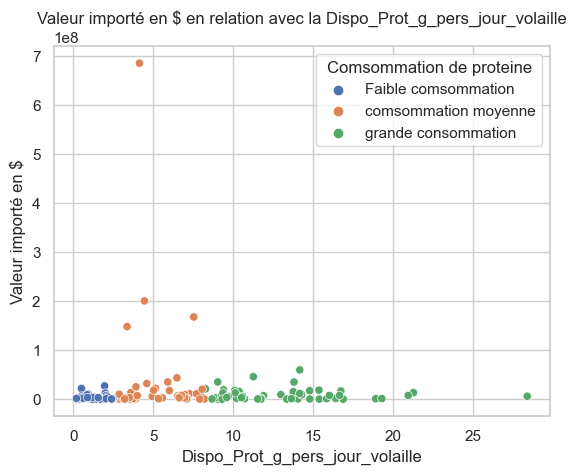

Test de Kruskal-Wallis: Statistiques=8.665, p=0.01314
Corrélation avec Dispo_Prot_g_pers_jour_volaille : 0.22
Il existe une différence significative de comsommation de proteine de volaille pour la variable Valeur importé en $.
Les différences dans Valeur importé en $ de comsommation de proteine de volaille ne sont pas dues au hasard,
mais sont statistiquement significatives.
Cela suggère que la variable Valeur importé en $ est influencée par la comsommation de proteine de volaille.

--------------------------------------------------
Analyse bivariée pour Qté de production poulets
--------------------------------------------------


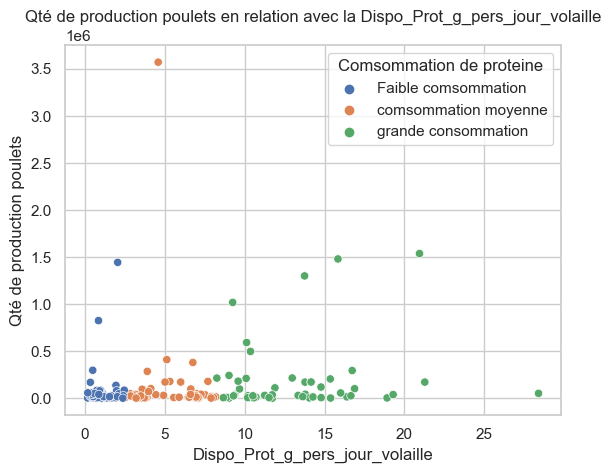

Test de Kruskal-Wallis: Statistiques=5.912, p=0.05202
Corrélation avec Dispo_Prot_g_pers_jour_volaille : 0.17
Il n'existe pas de différence significativede comsommation de proteine de volaille pour la variable Qté de production poulets.
Les variations observées dans Qté de production poulets entre les groupes peuvent être attribuées au hasard.
Cela suggère que la variable Qté de production poulets n'est pas fortement influencée par la de comsommation de proteine de volaille.


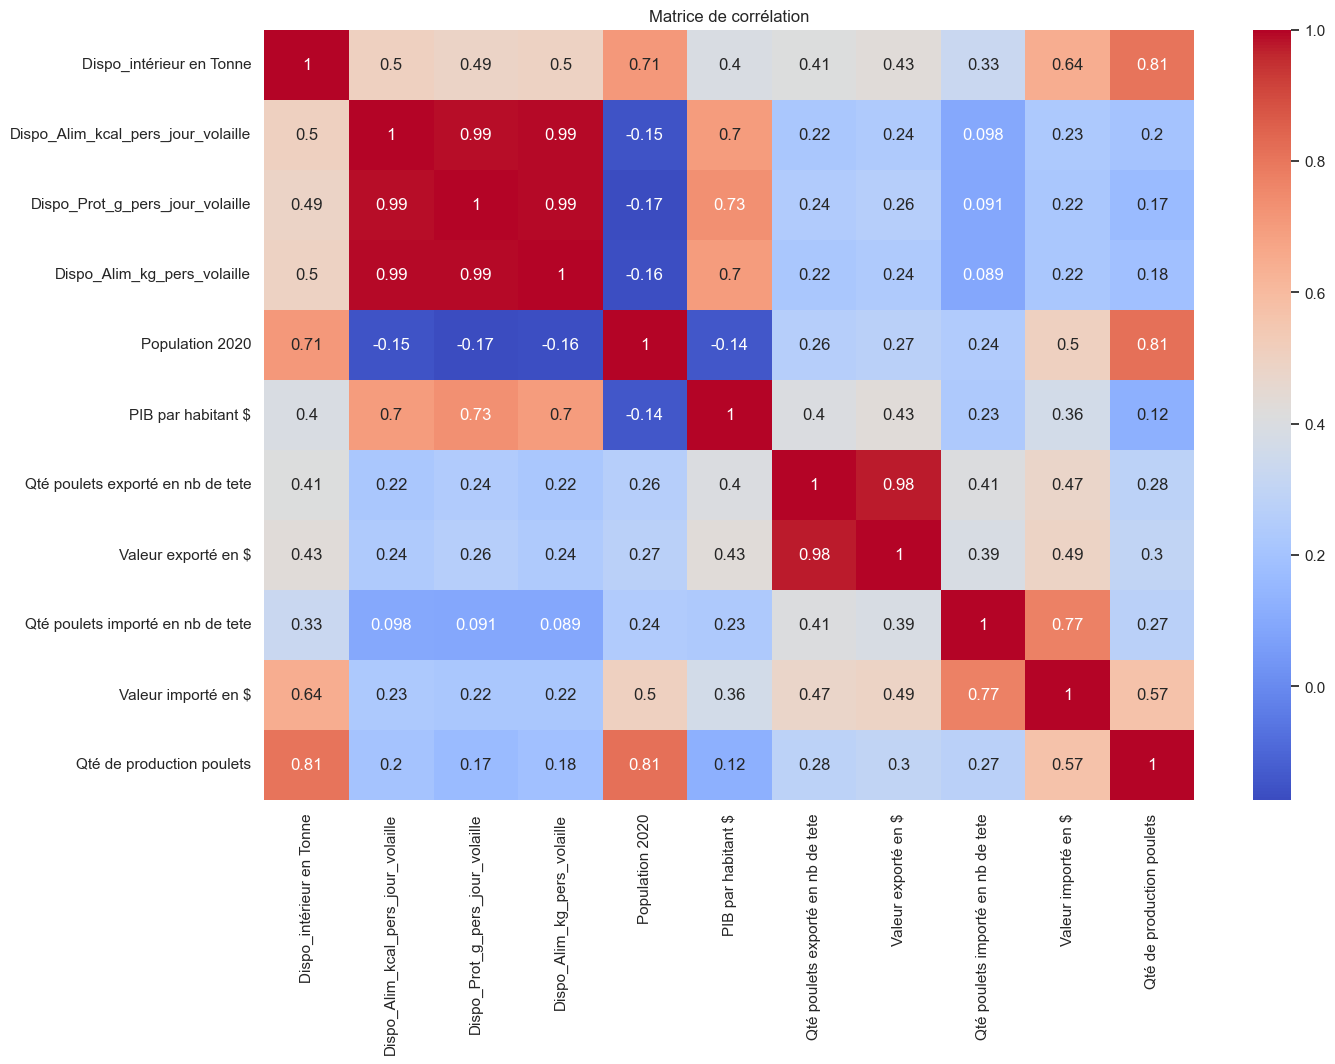

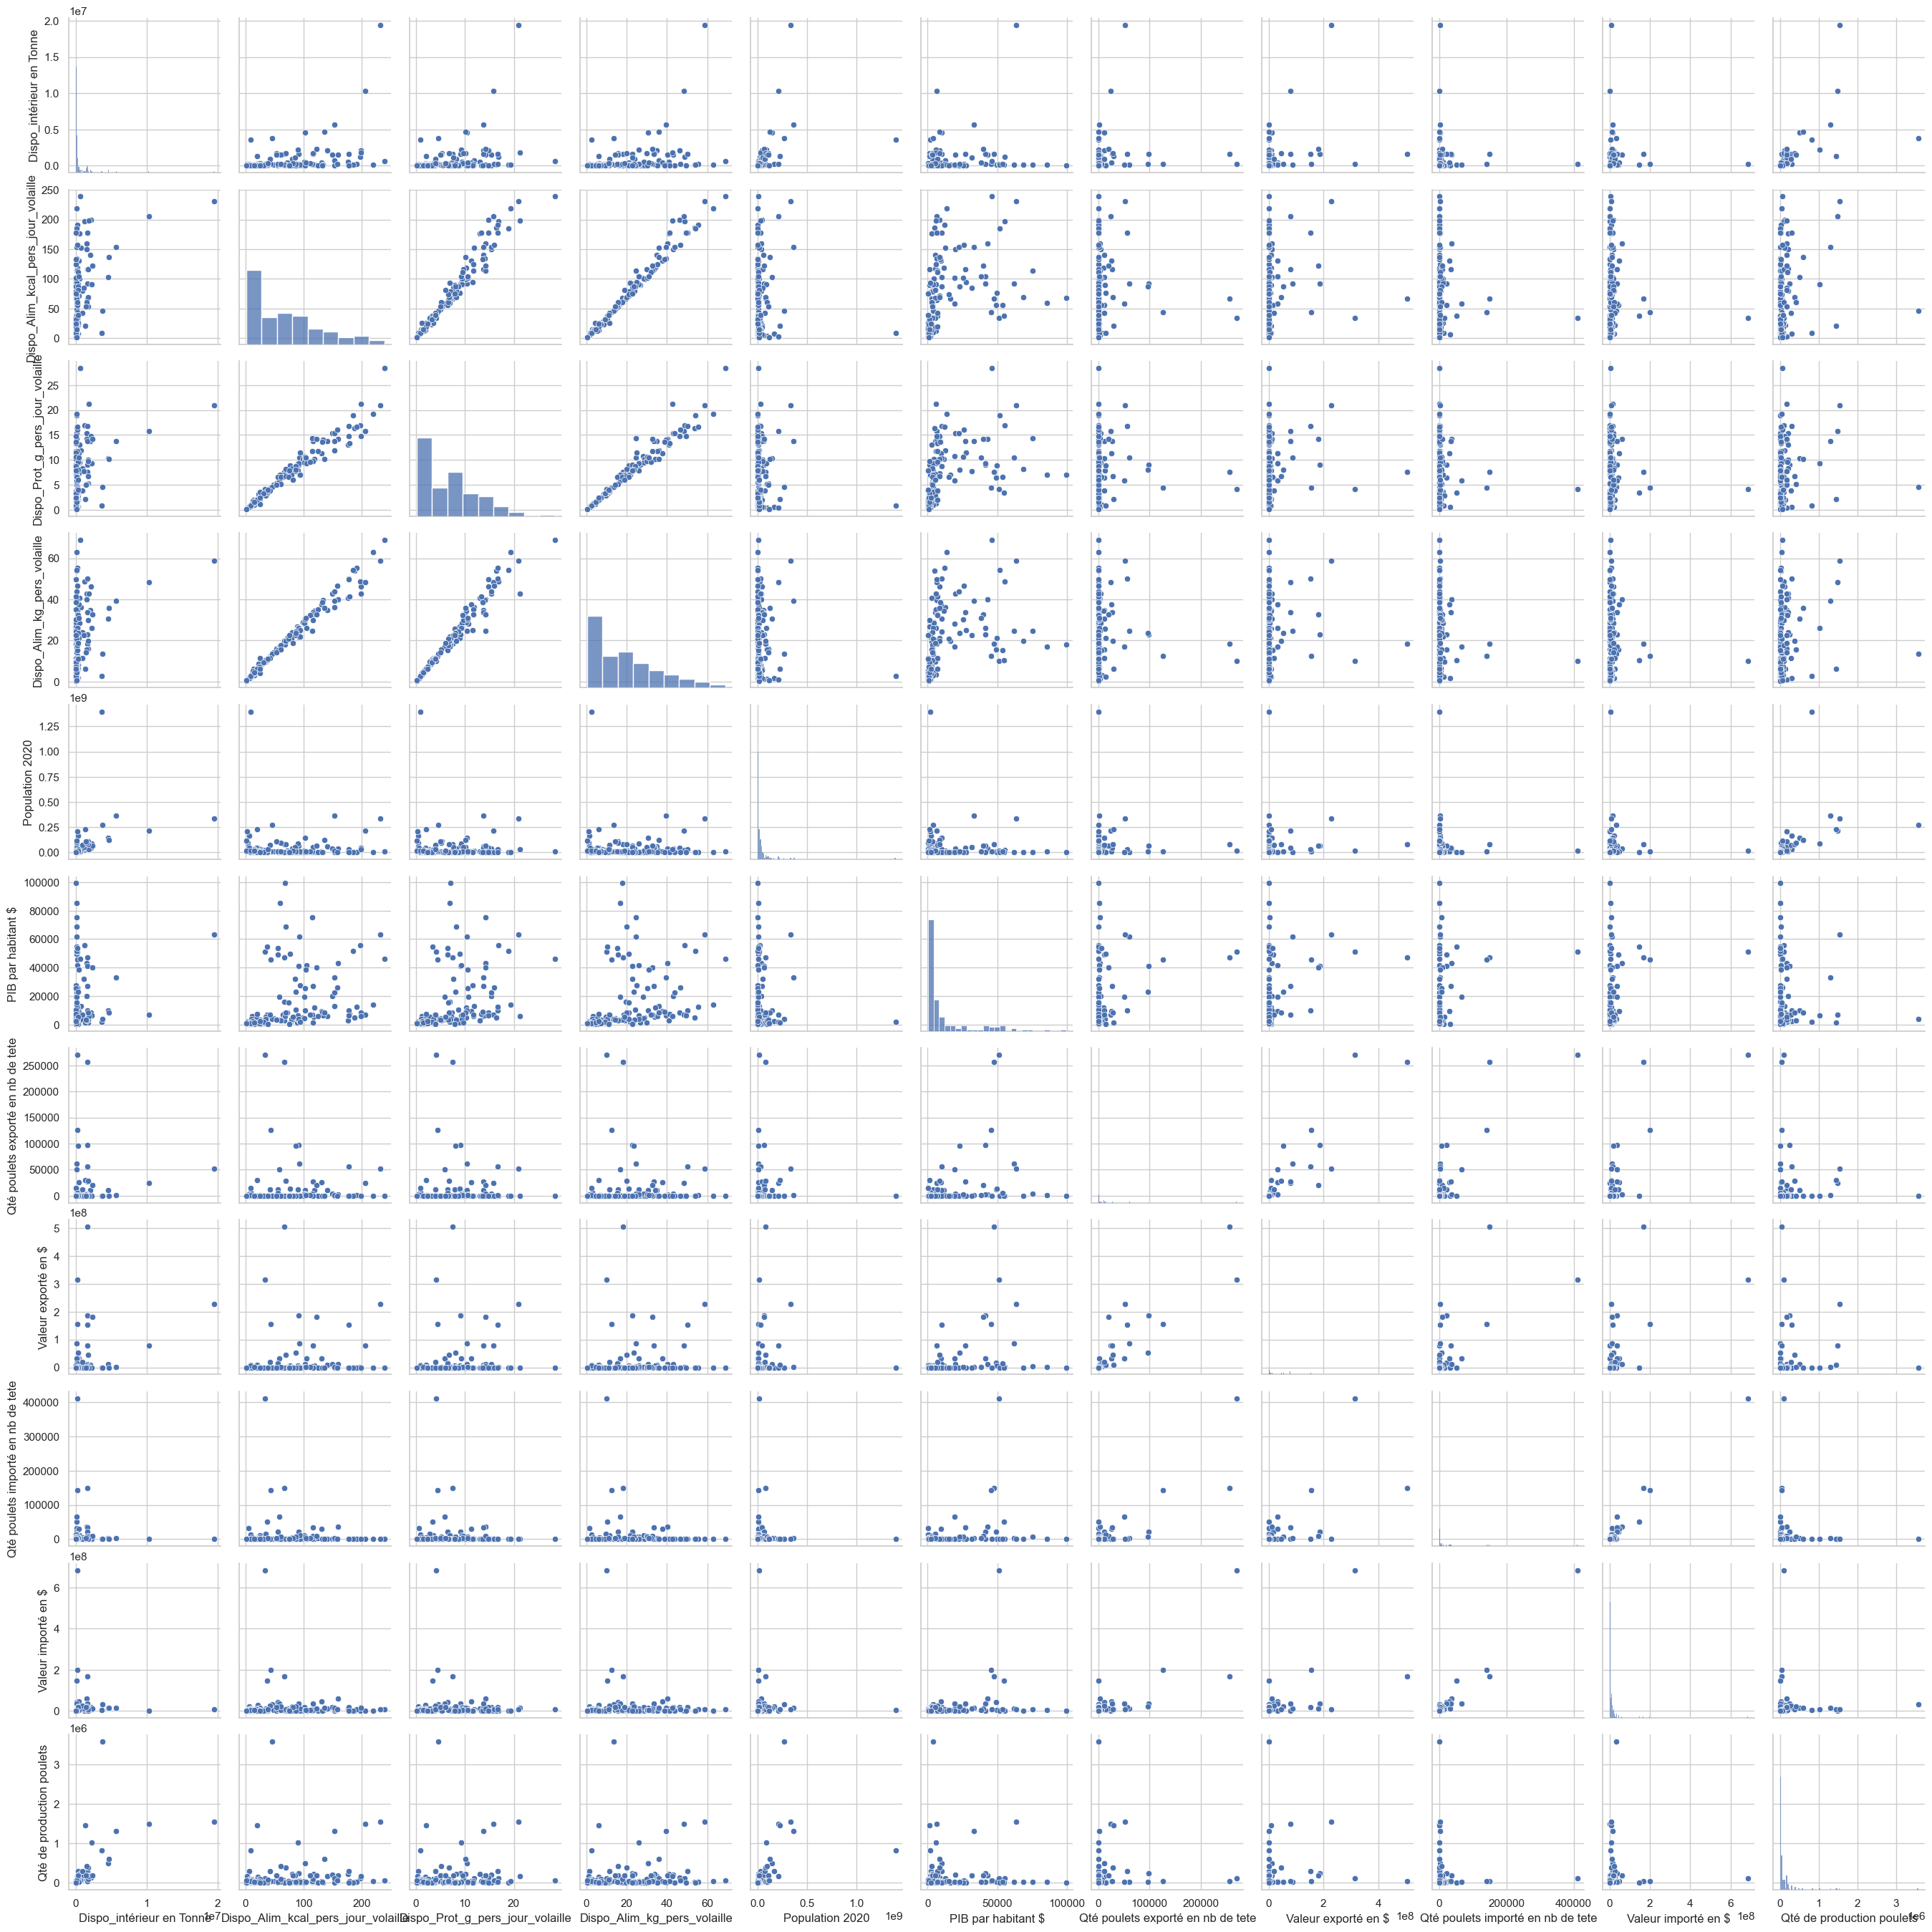


La corrélation entre Dispo_Alim_kcal_pers_jour_volaille et Dispo_intérieur en Tonne est 0.50
Il y a une corrélation positive entre Dispo_Alim_kcal_pers_jour_volaille et Dispo_intérieur en Tonne.

La corrélation entre Dispo_Prot_g_pers_jour_volaille et Dispo_Alim_kcal_pers_jour_volaille est 0.99
Il y a une corrélation positive entre Dispo_Prot_g_pers_jour_volaille et Dispo_Alim_kcal_pers_jour_volaille.

La corrélation entre Dispo_Alim_kg_pers_volaille et Dispo_Alim_kcal_pers_jour_volaille est 0.99
Il y a une corrélation positive entre Dispo_Alim_kg_pers_volaille et Dispo_Alim_kcal_pers_jour_volaille.

La corrélation entre Dispo_Alim_kg_pers_volaille et Dispo_Prot_g_pers_jour_volaille est 0.99
Il y a une corrélation positive entre Dispo_Alim_kg_pers_volaille et Dispo_Prot_g_pers_jour_volaille.

La corrélation entre Population 2020 et Dispo_intérieur en Tonne est 0.71
Il y a une corrélation positive entre Population 2020 et Dispo_intérieur en Tonne.

La corrélation entre PIB par habitant

In [23]:
# J'importe les outils statistiques dont j'ai besoin.
from scipy.stats import f_oneway, kruskal, spearmanr

# Je définis des étiquettes pour distinguer les différents niveaux de consommation de protéines.
labels = ["Faible comsommation", "comsommation moyenne", "grande consommation"]

# Je définis des seuils pour séparer ces niveaux de consommation.
# J'utilise les quantiles de la distribution de la consommation de protéines pour cela.
thresholds = [
    df['Dispo_Prot_g_pers_jour_volaille'].quantile(0), 
    df['Dispo_Prot_g_pers_jour_volaille'].quantile(0.33), 
    df['Dispo_Prot_g_pers_jour_volaille'].quantile(0.66), 
    df['Dispo_Prot_g_pers_jour_volaille'].max()
]

# J'ajoute une nouvelle colonne à mon DataFrame pour indiquer le niveau de consommation de chaque ligne.
df['Comsommation de proteine'] = pd.cut(df['Dispo_Prot_g_pers_jour_volaille'], bins=thresholds, labels=labels)

# Pour chaque colonne numérique du DataFrame,
for col in df.select_dtypes(include=[np.number]).columns:
    # J'affiche le nom de la colonne,
    print(f"\n{'-'*50}\nAnalyse bivariée pour {col}\n{'-'*50}")
    # Je génère un graphique qui montre la relation entre cette variable et la consommation de protéines,
    sns.scatterplot(data=df, x='Dispo_Prot_g_pers_jour_volaille', y=col, hue='Comsommation de proteine')
    plt.title(f'{col} en relation avec la Dispo_Prot_g_pers_jour_volaille')
    plt.show()

    # Je vérifie si la distribution des valeurs de cette variable est normale.
    stat, p = kstest(df[col], 'norm')
    if p > 0.05:  # Si la distribution est normale,
        # Je calcule le coefficient de corrélation de Pearson et je fais un test ANOVA.
        corr, _ = pearsonr(df['Dispo_Prot_g_pers_jour_volaille'], df[col])
        f_stat, p_val = f_oneway(df[col][df['Comsommation de proteine'] == labels[0]],
                                 df[col][df['Comsommation de proteine'] == labels[1]],
                                 df[col][df['Comsommation de proteine'] == labels[2]])
        print(f'ANOVA: Statistiques={f_stat:.3f}, p={p_val:.5f}')
    else:  # Si la distribution n'est pas normale,
        # Je calcule le coefficient de corrélation de Spearman et je fais un test de Kruskal-Wallis.
        corr, _ = spearmanr(df['Dispo_Prot_g_pers_jour_volaille'], df[col])
        f_stat, p_val = kruskal(df[col][df['Comsommation de proteine'] == labels[0]],
                                df[col][df['Comsommation de proteine'] == labels[1]],
                                df[col][df['Comsommation de proteine'] == labels[2]])
        print(f'Test de Kruskal-Wallis: Statistiques={f_stat:.3f}, p={p_val:.5f}')

    # J'affiche le coefficient de corrélation pour la variable en cours.
    print(f'Corrélation avec Dispo_Prot_g_pers_jour_volaille : {corr:.2f}')

    # Je vérifie si la différence entre les groupes de consommation de protéines est statistiquement significative pour cette variable.
    if p_val < 0.05:  # Si c'est le cas,
        print(f"Il existe une différence significative de comsommation de proteine de volaille pour la variable {col}.\nLes différences dans {col} de comsommation de proteine de volaille ne sont pas dues au hasard,\nmais sont statistiquement significatives.\nCela suggère que la variable {col} est influencée par la comsommation de proteine de volaille.")
    else:  # Si ce n'est pas le cas,
        print(f"Il n'existe pas de différence significativede comsommation de proteine de volaille pour la variable {col}.\nLes variations observées dans {col} entre les groupes peuvent être attribuées au hasard.\nCela suggère que la variable {col} n'est pas fortement influencée par la de comsommation de proteine de volaille.")



# Je visualise ensuite cette matrice de corrélation à l'aide d'un heatmap. 
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# Utilisation du pairplot pour visualiser les relations entre les différentes variables
sns.pairplot(df)
plt.show()

# Pour chaque paire de variables, je vérifie si la corrélation est supérieure à 0.5. 
# Si c'est le cas, je commente sur le type de corrélation (positive ou négative).
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:  
            print(f"\nLa corrélation entre {corr_matrix.columns[i]} et {corr_matrix.columns[j]} est {corr_matrix.iloc[i, j]:.2f}")
            if corr_matrix.iloc[i, j] > 0:
                print(f"Il y a une corrélation positive entre {corr_matrix.columns[i]} et {corr_matrix.columns[j]}.")
            else:
                print(f"Il y a une corrélation négative entre {corr_matrix.columns[i]} et {corr_matrix.columns[j]}.")

In [24]:
# Vérification des types de données
df_filtré.dtypes


Zone                                   object
Dispo_intérieur en Tonne              float64
Dispo_Alim_kcal_pers_jour_volaille    float64
Dispo_Prot_g_pers_jour_volaille       float64
Dispo_Alim_kg_pers_volaille           float64
Population 2020                       float64
Evol Population 2010-2020 en %        float64
PIB par habitant $                    float64
Qté poulets exporté en nb de tete     float64
Valeur exporté en $                   float64
Qté poulets importé en nb de tete     float64
Valeur importé en $                   float64
Qté de production poulets             float64
dtype: object

In [25]:
# vérification des valeurs manquante
df_filtré.isnull().sum()


Zone                                  0
Dispo_intérieur en Tonne              0
Dispo_Alim_kcal_pers_jour_volaille    0
Dispo_Prot_g_pers_jour_volaille       0
Dispo_Alim_kg_pers_volaille           0
Population 2020                       0
Evol Population 2010-2020 en %        0
PIB par habitant $                    0
Qté poulets exporté en nb de tete     0
Valeur exporté en $                   0
Qté poulets importé en nb de tete     0
Valeur importé en $                   0
Qté de production poulets             0
dtype: int64

#### Statistique multivariée (ACP)

In [26]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Je crée un nouveau dataframe en excluant la colonne 'Zone'
df_filtré_numerique = df_filtré.drop('Zone', axis=1)

# Je normalise les données en utilisant StandardScaler
scaler = StandardScaler()
df_normalise = scaler.fit_transform(df_filtré_numerique)

# Je initialise PCA
pca = PCA()

# Je applique PCA aux données normalisées
df_pca = pca.fit_transform(df_normalise)

# Je récupère la quantité de variance expliquée par chaque composant principal
var = pca.explained_variance_ratio_

# Je calcule la variance cumulative
var_cumulative = var.cumsum()

# Création d'un dataframe pour stocker la variance expliquée et la variance cumulative
df_variance = pd.DataFrame({
    'PC': [f"PC{i+1}" for i in range(len(var))], 
    'Variance Expliquée (%)': var*100,
    'Variance Cumulative (%)': var_cumulative*100
})

# Pour arrondir à deux décimales et ajouter le symbole '%'
df_variance['Variance Expliquée (%)'] = df_variance['Variance Expliquée (%)'].apply(lambda x: f"{x:.2f}%")
df_variance['Variance Cumulative (%)'] = df_variance['Variance Cumulative (%)'].apply(lambda x: f"{x:.2f}%")

df_filtré.to_csv('Données_originale.csv', index=False)

# Convertir df_std en DataFrame
df_std_export = pd.DataFrame(df_pca, columns=df_filtré_numerique.columns)

# Exporter vers un fichier CSV
df_std_export.to_csv('Données_standardisé.csv', index=False)

# Liste des noms de variables
variable_names = df_filtré_numerique.columns.tolist()

# Ajout d'une nouvelle colonne pour les noms de variables
df_variance['Noms de Variables'] = variable_names

# Réorganiser les colonnes pour avoir la nouvelle colonne à la position souhaitée
df_variance = df_variance[['PC', 'Noms de Variables', 'Variance Expliquée (%)', 'Variance Cumulative (%)']]

# Affichage du DataFrame
display(df_variance)


,PC,Noms de Variables,Variance Expliquée (%),Variance Cumulative (%)
0,PC1,Dispo_intérieur en Tonne,33.81%,33.81%
1,PC2,Dispo_Alim_kcal_pers_jour_volaille,26.48%,60.29%
2,PC3,Dispo_Prot_g_pers_jour_volaille,15.74%,76.03%
3,PC4,Dispo_Alim_kg_pers_volaille,6.64%,82.67%
4,PC5,Population 2020,5.68%,88.35%
5,PC6,Evol Population 2010-2020 en %,4.64%,92.99%
6,PC7,PIB par habitant $,4.06%,97.05%
7,PC8,Qté poulets exporté en nb de tete,2.25%,99.30%
8,PC9,Valeur exporté en $,0.34%,99.64%
9,PC10,Qté poulets importé en nb de tete,0.16%,99.80%


Graphique cercle de corrélation 

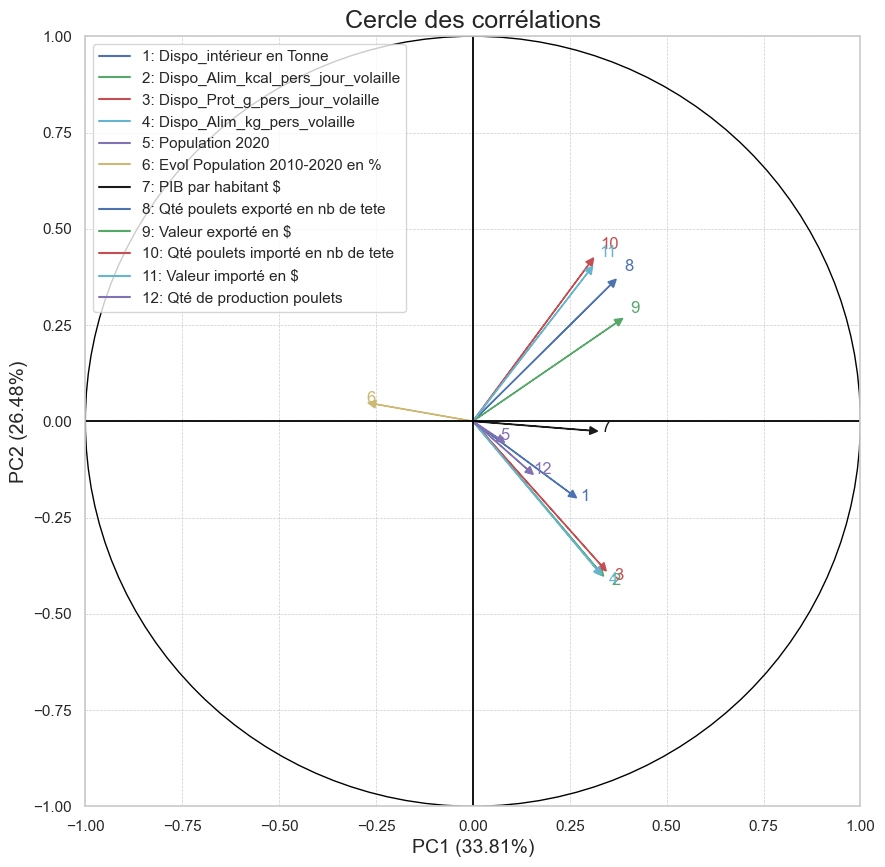

In [27]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
def palette(i):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    return colors[i % len(colors)]

# Standardisation des données et application de PCA
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_filtré_numerique)
pca = PCA()
principalComponents = pca.fit_transform(df_pca_scaled)

# Création du DataFrame df_pca
df_pca = pd.DataFrame(principalComponents, columns=['PC' + str(i) for i in range(1, len(df_filtré_numerique.columns) + 1)])
df_pca['Zone'] = df_filtré['Zone'].reset_index(drop=True)

# Pourcentage de variance expliquée
explained_var_ratio = pca.explained_variance_ratio_

# Dessin du cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 10))

# Affichage des pourcentages de variance
plt.xlabel(f'PC1 ({explained_var_ratio[0]*100:.2f}%)', fontsize=14)
plt.ylabel(f'PC2 ({explained_var_ratio[1]*100:.2f}%)', fontsize=14)

lines = []
for i in range(len(pca.components_[0])):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=0.02, head_length=0.02, color=palette(i))
    ax.text(pca.components_[0, i] * 1.1, pca.components_[1, i] * 1.1, str(i + 1), color=palette(i), fontsize=12, ha='left')
    line = mlines.Line2D([], [], color=palette(i), markersize=15, label='{}: {}'.format(i + 1, df_filtré_numerique.columns[i]))
    lines.append(line)

circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Ajout d'un quadrillage plus détaillé
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajout des lignes d'axe
plt.axhline(0, color='black', linewidth=1.3)
plt.axvline(0, color='black', linewidth=1.3)

plt.title('Cercle des corrélations', fontsize=18)


ax.legend(handles=lines, loc='best')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


Graphique carte des individus et éboulis des valeurs propre

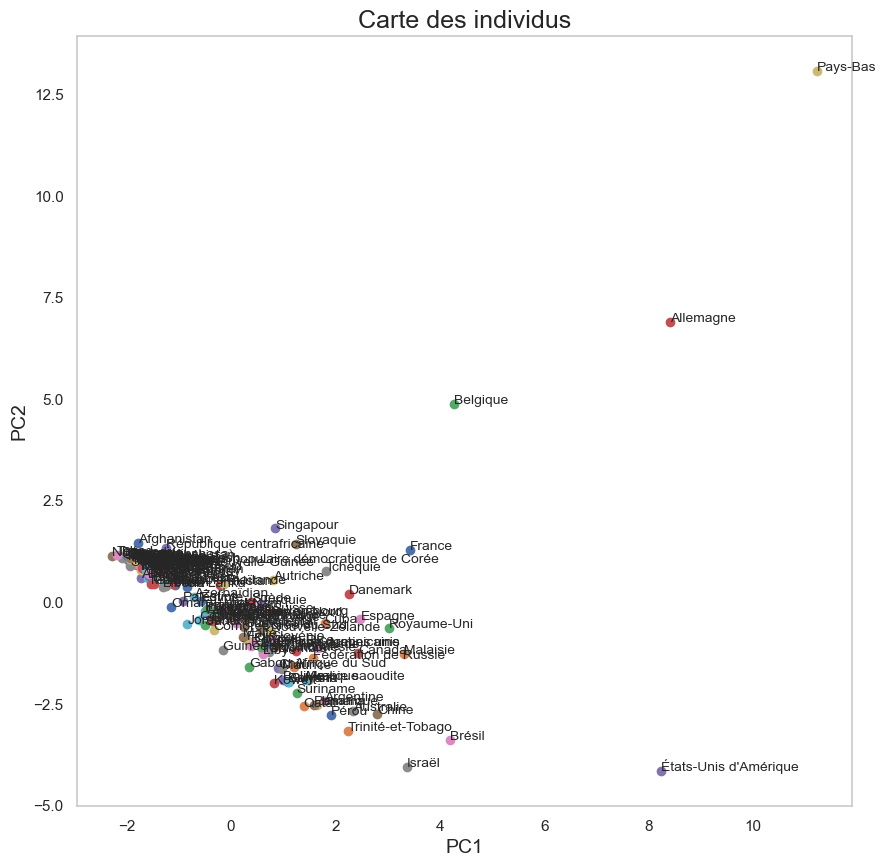

Outliers :
Allemagne
Belgique
Brésil
Chine
Israël
Pays-Bas
Trinité-et-Tobago
États-Unis d'Amérique


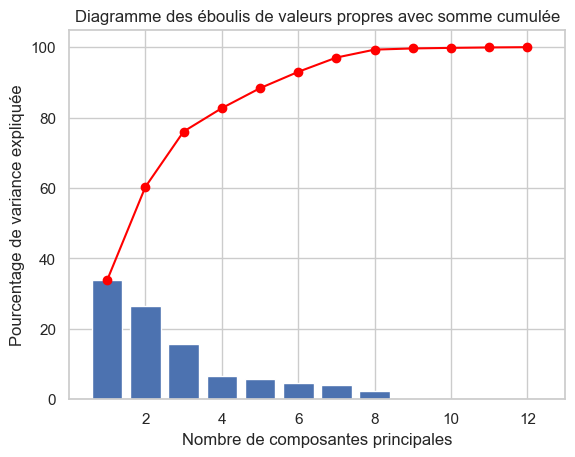

In [28]:


# J'affiche le graphique.
plt.show()

# Ici, je trace la carte des individus.
fig, ax = plt.subplots(figsize=(10, 10))

# Je trace chaque point et j'ajoute le nom du pays.
for i in range(df_pca.shape[0]):
    ax.scatter(df_pca.loc[i, 'PC1'], df_pca.loc[i, 'PC2'])
    ax.text(df_pca.loc[i, 'PC1'], df_pca.loc[i, 'PC2'], df_pca.loc[i, 'Zone'], fontsize=10)

# J'ajuste l'apparence du graphique.
plt.title('Carte des individus', fontsize=18)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.grid()

# J'affiche le graphique.
plt.show()

# Ici, je calcule la distance de chaque point à l'origine.
df_pca['distance'] = np.sqrt(df_pca['PC1']**2 + df_pca['PC2']**2)

# Je définis un seuil pour considérer un point comme un outlier.
seuil = df_pca['distance'].quantile(0.95)  # par exemple, tous les points au-delà du 95ème percentile

# Je trouve les outliers.
outliers = df_pca[df_pca['distance'] > seuil]

# J'affiche les noms des outliers.
print("Outliers :")
for index, row in outliers.iterrows():
    print(row['Zone'])

# Je crée une fonction pour afficher le diagramme d'éboulis.
def afficher_diagramme_eboulis(pca):
    eboulis = pca.explained_variance_ratio_ * 100
    plt.bar(np.arange(len(eboulis)) + 1, eboulis)
    plt.plot(np.arange(len(eboulis)) + 1, eboulis.cumsum(), c="red", marker='o')
    plt.xlabel("Nombre de composantes principales")
    plt.ylabel("Pourcentage de variance expliquée")
    plt.title("Diagramme des éboulis de valeurs propres avec somme cumulée")
    plt.show(block=False)


# Appel de fonction pour afficher le graphique.
afficher_diagramme_eboulis(pca)


